## Problem Statement

Problem 1:

You are hired by one of the leading news channel CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

Dataset for Problem: Election_Data.xlsx

Data Ingestion: 12 marks
1. Read the dataset. Do the descriptive statistics and do null value condition check. Write an inference on it. (5 Marks)


### Upload Required Libraries

In [542]:
import numpy as np   
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
from sklearn.metrics import roc_auc_score,plot_roc_curve

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('fivethirtyeight')

### Importing data

In [543]:
df = pd.read_excel("Election_Data.xlsx",sheet_name = 'Election_Dataset_Two Classes' )

### EDA

In [544]:
# Check top few records to get a feel of the data structure
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male



### Shape

In [545]:
df.shape

(1525, 10)

### Data type of data features

In [546]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


checking for Possible columns which are categorical but are not having data type "object"

#### Making different list for categorical columns and numerical columns

In [547]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [548]:
# Shape of the dataframe
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  1525 
no. of columns:  9


In [549]:
cat=['vote',"gender"]
num =[x for x in df.columns if x not in cat] # list comprehension

print(cat)
print(num)

['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


Summary Statistics for numerical and categorical columns

In [550]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


#### Printing Categorical Values with their Counts

In [551]:
for catvar in cat:
    print(catvar,'  No of Levels:',df[catvar].nunique())
    print(df[catvar].value_counts())
    print('\n\n')

vote   No of Levels: 2
Labour          1063
Conservative     462
Name: vote, dtype: int64



gender   No of Levels: 2
female    812
male      713
Name: gender, dtype: int64





#### Check for Null Values 

In [552]:

df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

No independent & Dependint  features have missing values

#### Checking for Duplicate Records

In [553]:
## Are there any duplicate records?

dups = df.duplicated()
dups.sum()

8

## Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts)

**There are 8 duplicate Values present in the Dataset so we have to drop them**

In [554]:
df.drop_duplicates(inplace=True) 

####  construct box plot for Numerical variables

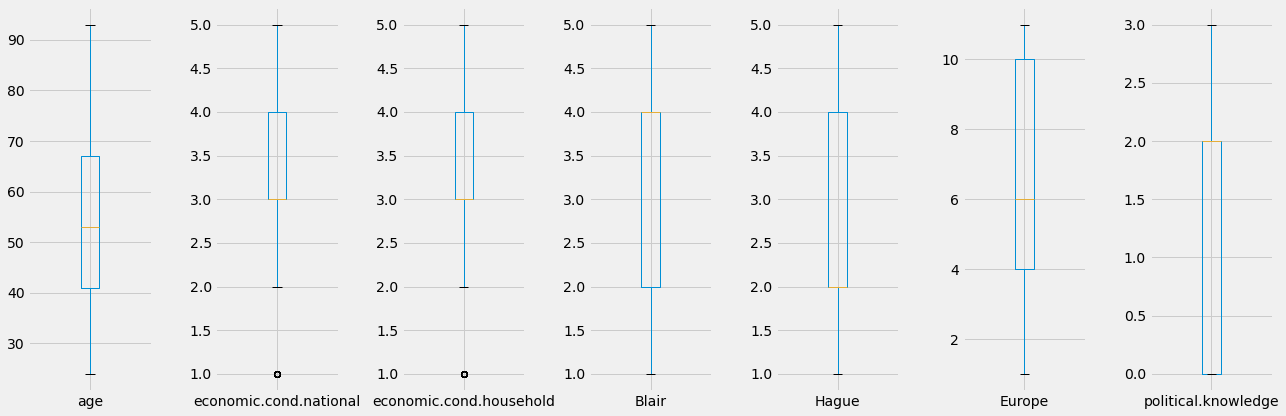

In [555]:

df[num].plot(kind = 'box', subplots = True, figsize = (18,6))
plt.tight_layout();

No outliers are present here in "age", & Other Columns econiomic conditions are ordinal Variables so the can't are not an Outiler (as per Outlier defination Outliers are those values which are Mistakenly Captured in the data)

#### As we can see that Age variable is having discreete values so to convert this to ordinal values we will use binning method as below

In [556]:
df['age_bins'] = pd.cut(x=df['age'], bins=[20, 29, 39, 49,59,69,79,89,99],labels=['20s', '30s', '40s','50s','60s','70s','80s','90s'])


In [557]:
df['age_bins'].unique().sort_values()

[20s, 30s, 40s, 50s, 60s, 70s, 80s, 90s]
Categories (8, object): [20s < 30s < 40s < 50s < 60s < 70s < 80s < 90s]

In [558]:
df.head(2)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,age_bins
0,Labour,43,3,3,4,1,2,2,female,40s
1,Labour,36,4,4,4,4,5,2,male,30s


### Univariate Analysis

In [563]:
df.vote.value_counts()

Labour          1057
Conservative     460
Name: vote, dtype: int64

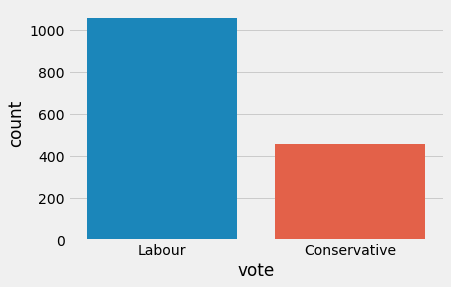

In [294]:
sns.countplot(df['vote']);

In [295]:
num

['age',
 'economic.cond.national',
 'economic.cond.household',
 'Blair',
 'Hague',
 'Europe',
 'political.knowledge']

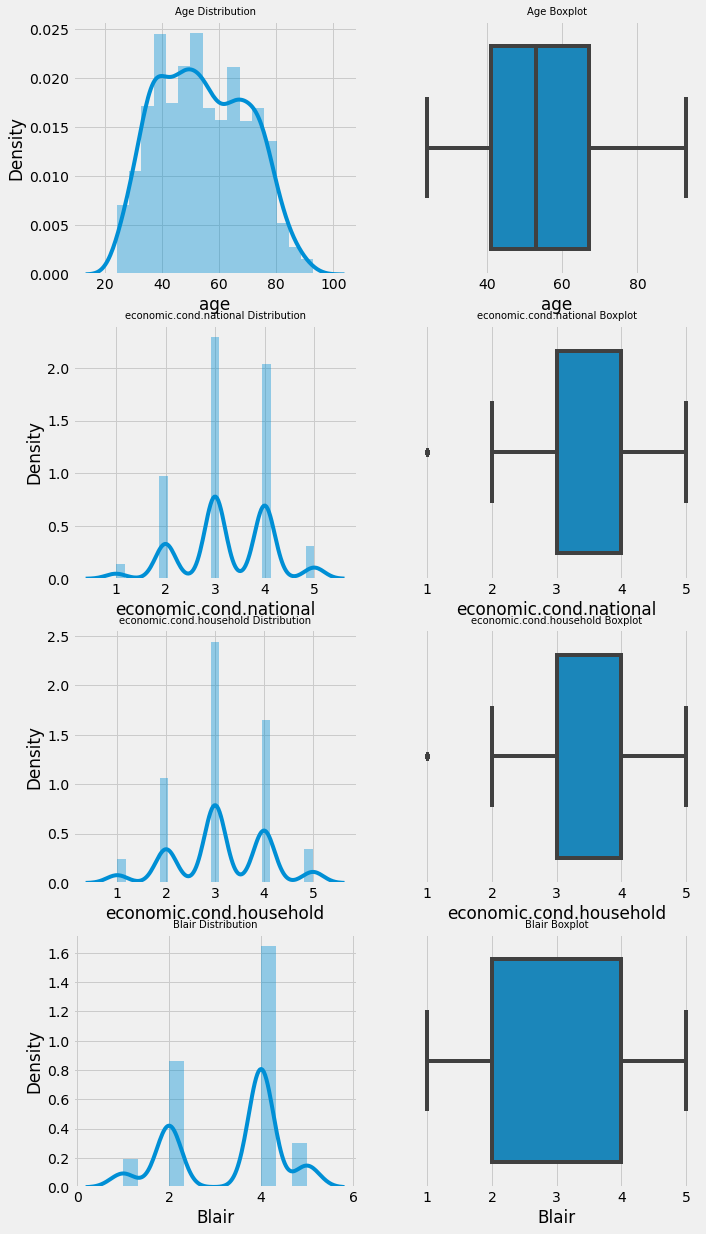

In [296]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,20)
a = sns.distplot(df['age'] , ax=axes[0][0])
a.set_title("Age Distribution",fontsize=10) # for subject reading

a = sns.boxplot(df['age'] , orient = "v" , ax=axes[0][1])
a.set_title("Age Boxplot",fontsize=10) # for subject reading

a = sns.distplot(df['economic.cond.national'] , ax=axes[1][0])
a.set_title("economic.cond.national Distribution",fontsize=10) #for subject writing

a = sns.boxplot(df['economic.cond.national'] , orient = "v" , ax=axes[1][1])
a.set_title("economic.cond.national Boxplot",fontsize=10) # for subject writing


a = sns.distplot(df['economic.cond.household'] , ax=axes[2][0])
a.set_title("economic.cond.household Distribution",fontsize=10) # for subject math

a = sns.boxplot(df['economic.cond.household'] , orient = "v" , ax=axes[2][1])
a.set_title("economic.cond.household Boxplot",fontsize=10) # for subject math

 
a = sns.distplot(df['Blair'] , ax=axes[3][0]) 
a.set_title("Blair Distribution",fontsize=10) # for subject science

a = sns.boxplot(df['Blair'] , orient = "v" , ax=axes[3][1])
a.set_title("Blair Boxplot",fontsize=10); # for subject science

# plt.show()

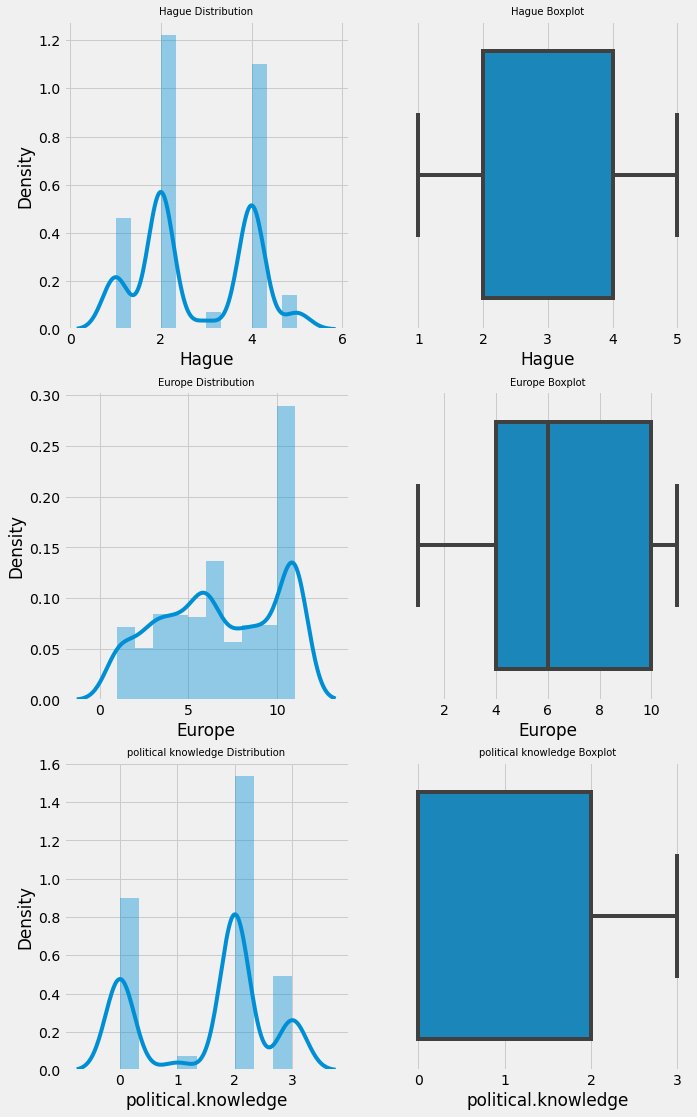

In [297]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(10,18)
a = sns.distplot(df['Hague'] , ax=axes[0][0])
a.set_title("Hague Distribution",fontsize=10)

a = sns.boxplot(df['Hague'] , orient = "v" , ax=axes[0][1])
a.set_title("Hague Boxplot",fontsize=10)

a = sns.distplot(df['Europe'] , ax=axes[1][0])
a.set_title("Europe Distribution",fontsize=10)

a = sns.boxplot(df['Europe'] , orient = "v" , ax=axes[1][1])
a.set_title("Europe Boxplot",fontsize=10)

a = sns.distplot(df['political.knowledge'] , ax=axes[2][0])
a.set_title("political knowledge Distribution",fontsize=10)

a = sns.boxplot(df['political.knowledge'] , orient = "v" , ax=axes[2][1])
a.set_title("political knowledge Boxplot",fontsize=10);
# plt.show()

In [565]:
df.skew()

age                        0.139800
economic.cond.national    -0.238474
economic.cond.household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political.knowledge       -0.422928
dtype: float64

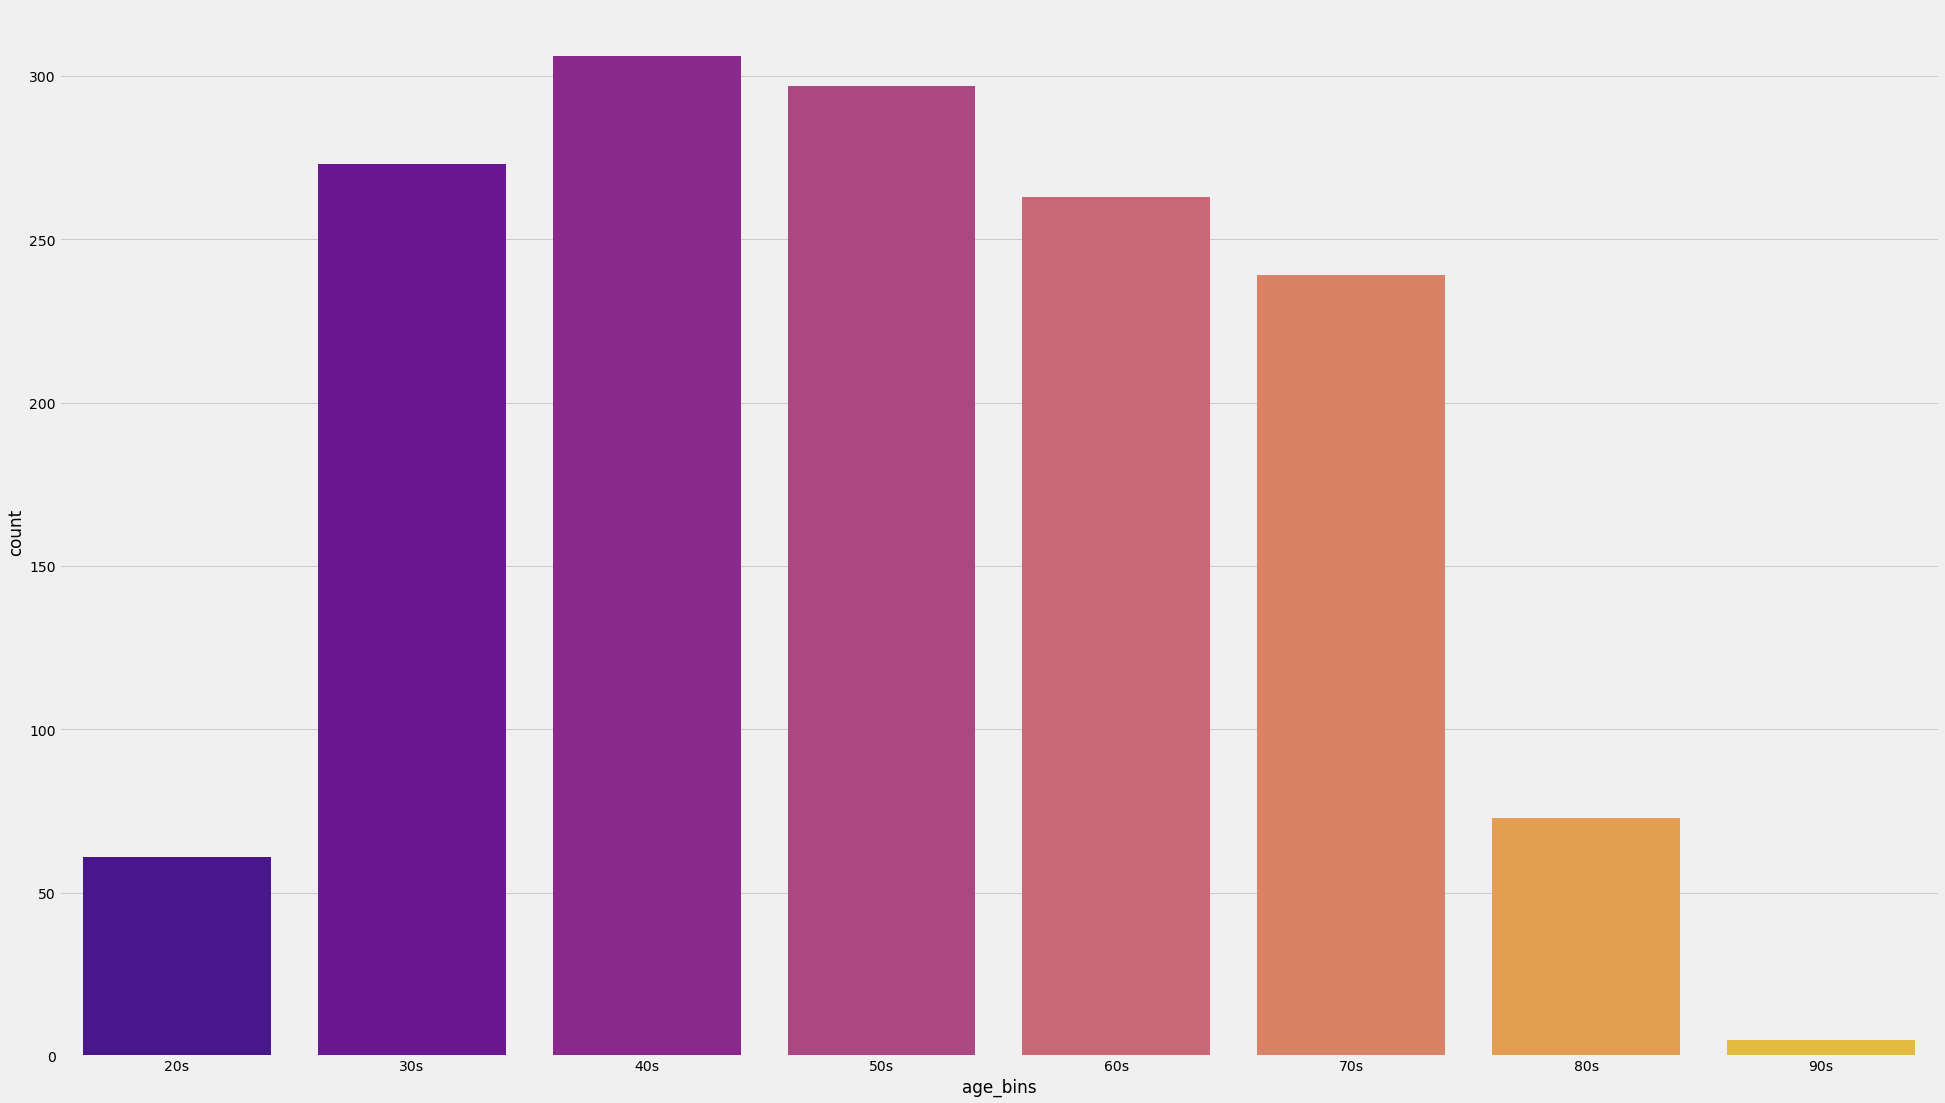

In [298]:
fig, ax = plt.subplots()

fig.set_size_inches(30, 18)
sns.countplot(df['age_bins'], ax=ax,palette='plasma');

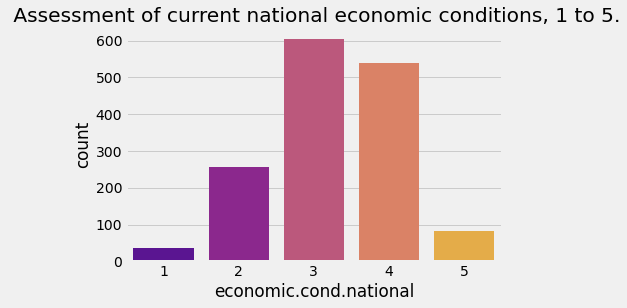

In [299]:
plt.title(' Assessment of current national economic conditions, 1 to 5.')
sns.countplot(df['economic.cond.national'],palette='plasma');

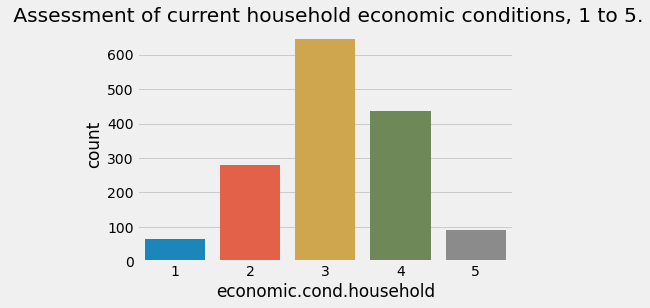

In [300]:
plt.title(' Assessment of current household economic conditions, 1 to 5.')
sns.countplot(df['economic.cond.household']);

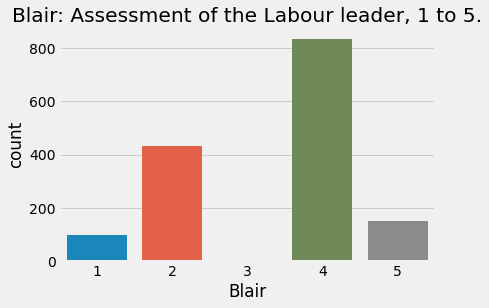

In [301]:
plt.title('Blair: Assessment of the Labour leader, 1 to 5.')
sns.countplot(df['Blair']);

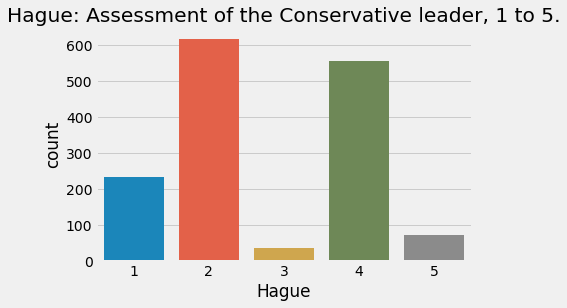

In [302]:
plt.title('Hague: Assessment of the Conservative leader, 1 to 5.')
sns.countplot(df['Hague']);

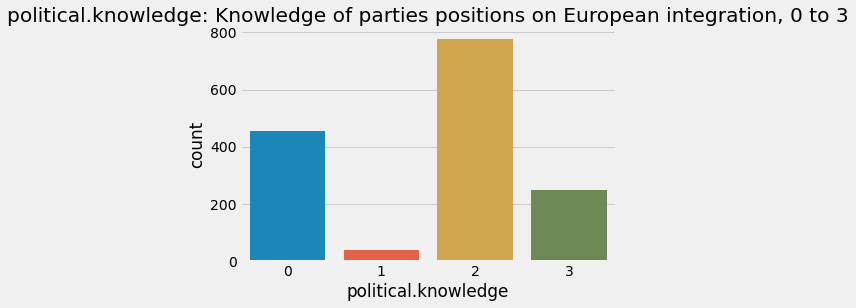

In [303]:
plt.title('political.knowledge: Knowledge of parties positions on European integration, 0 to 3')
sns.countplot(df['political.knowledge']);

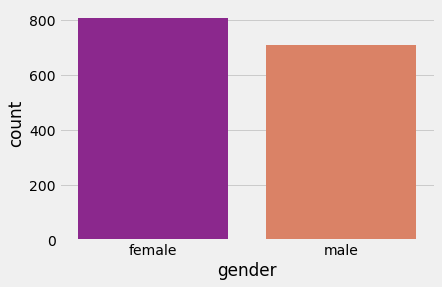

In [304]:

sns.countplot(df['gender'],palette='plasma');

###  Bivariate and Multivariate Analysis

In [305]:
df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender',
       'age_bins'],
      dtype='object')

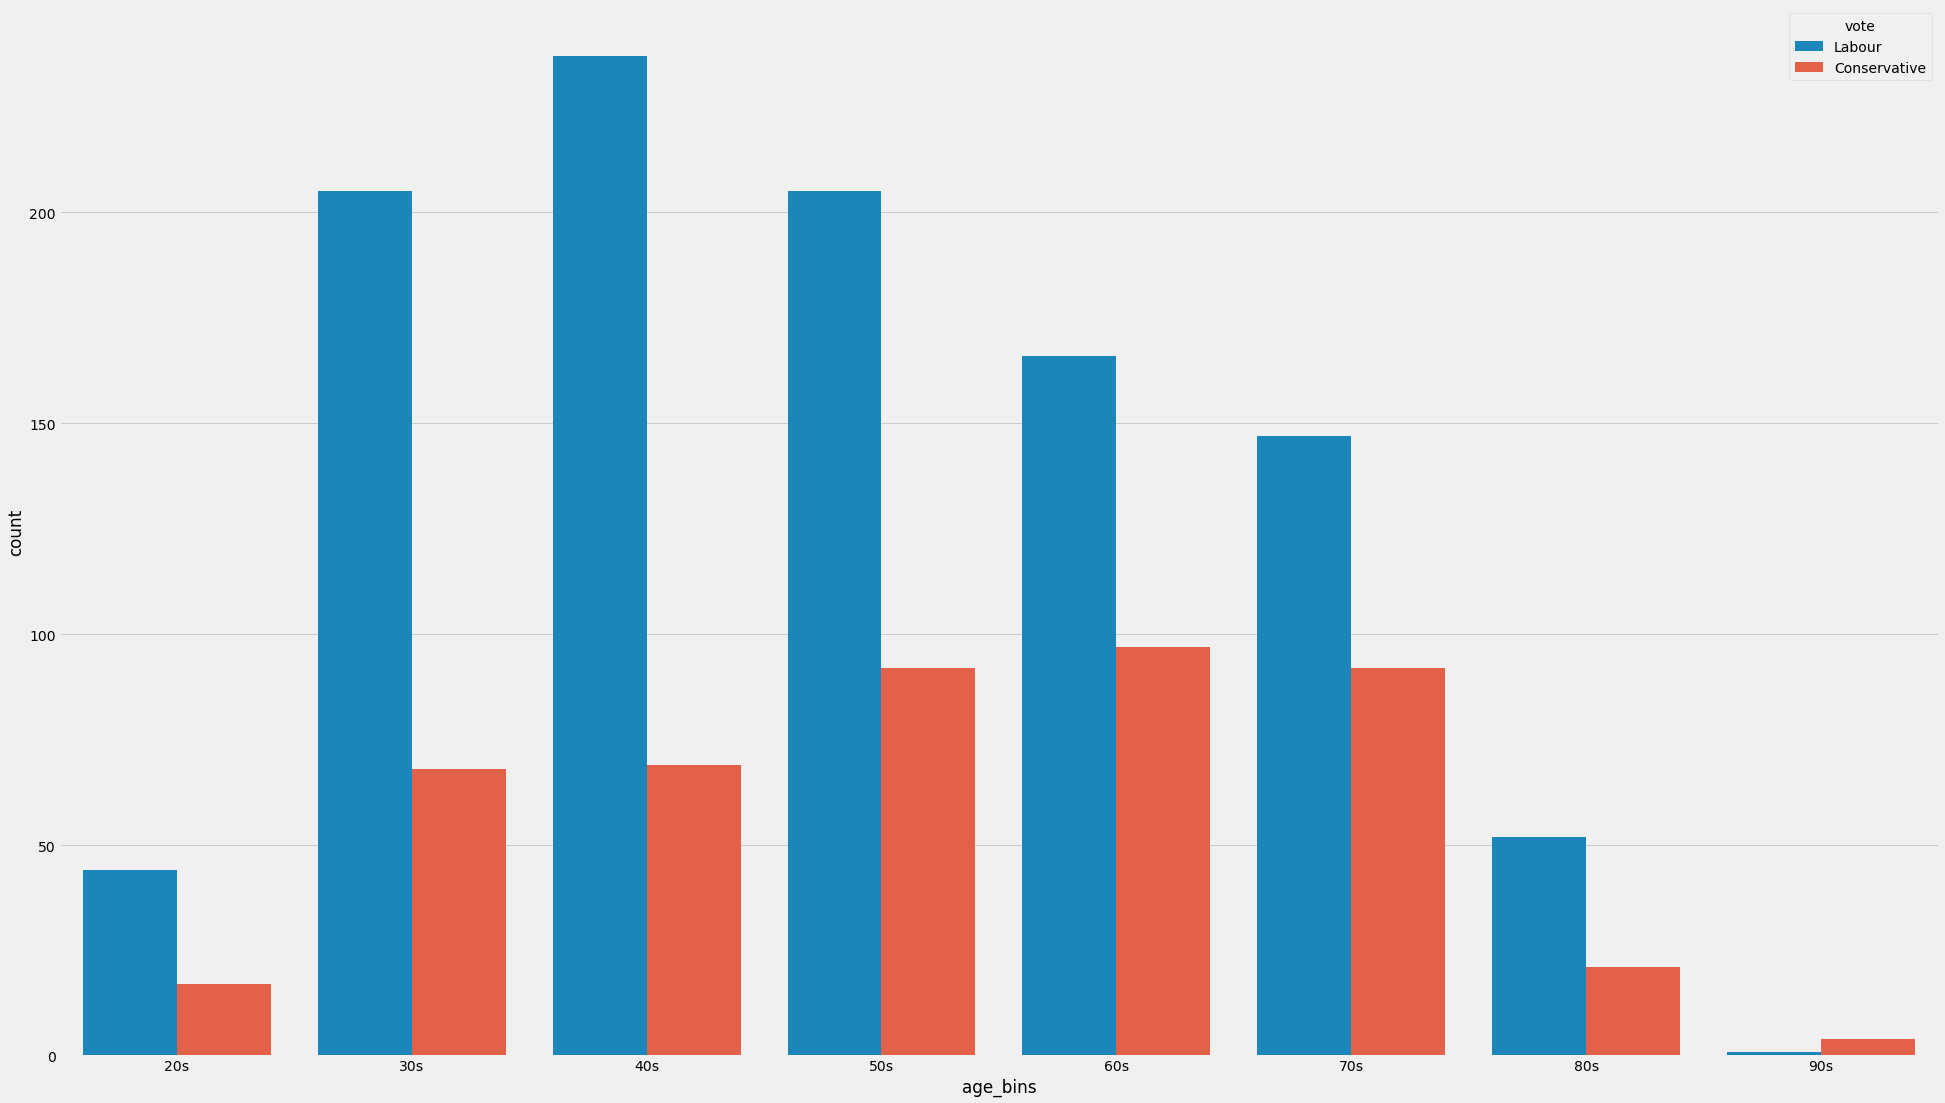

In [306]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(30, 18)
 
sns.countplot(x="age_bins", data=df, hue='vote')

**Above plot represents Labour Party is getting More Votes in each Age Group**

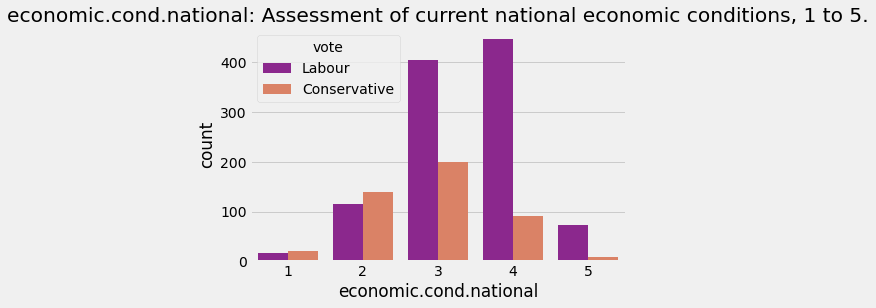

In [307]:
plt.title('economic.cond.national: Assessment of current national economic conditions, 1 to 5.')
sns.countplot(x="economic.cond.national", data=df, hue='vote',palette='plasma')

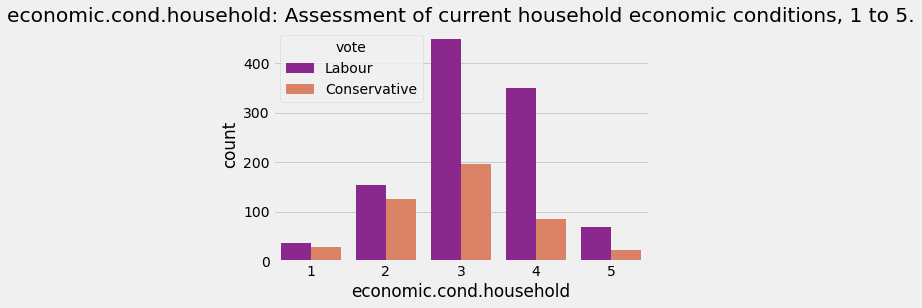

In [308]:
plt.title('economic.cond.household: Assessment of current household economic conditions, 1 to 5.')
sns.countplot(x="economic.cond.household", data=df, hue='vote',palette='plasma')

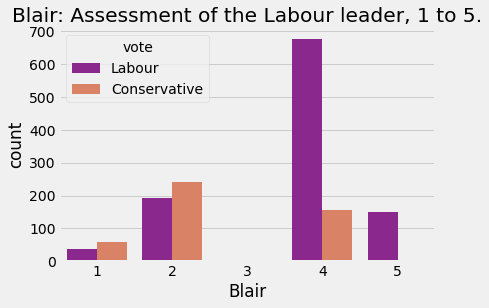

In [309]:
plt.title('Blair: Assessment of the Labour leader, 1 to 5.')
sns.countplot(x="Blair", data=df, hue='vote',palette='plasma')

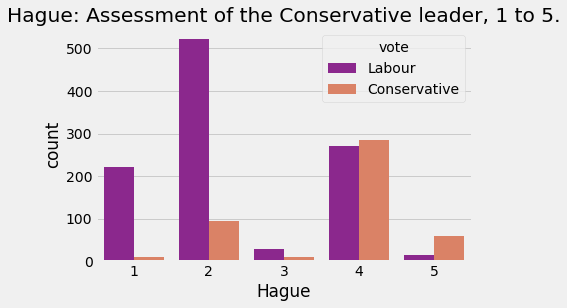

In [310]:
plt.title('Hague: Assessment of the Conservative leader, 1 to 5.')
sns.countplot(x="Hague", data=df, hue='vote',palette='plasma')

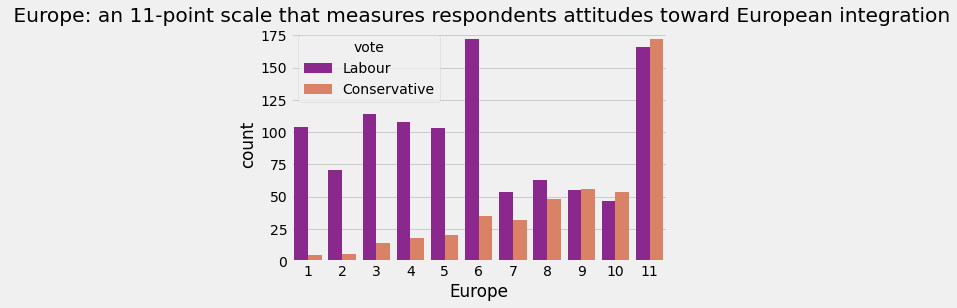

In [311]:
plt.title(' Europe: an 11-point scale that measures respondents attitudes toward European integration')
sns.countplot(x="Europe", data=df, hue='vote',palette='plasma')

**Euroscepticism, also known as EU-scepticism, means criticism of the European Union (EU) and European integration**

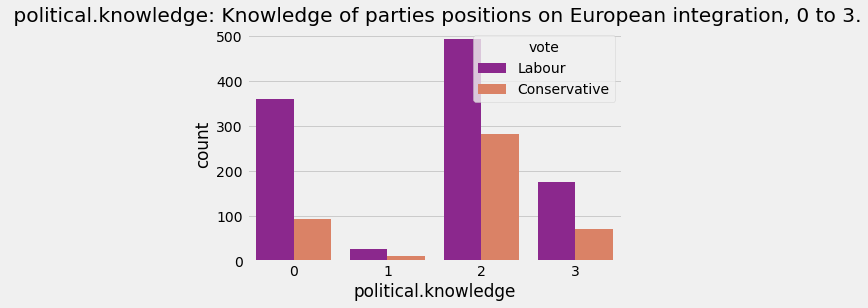

In [312]:
plt.title(' political.knowledge: Knowledge of parties positions on European integration, 0 to 3.')
sns.countplot(x="political.knowledge", data=df, hue='vote',palette='plasma')

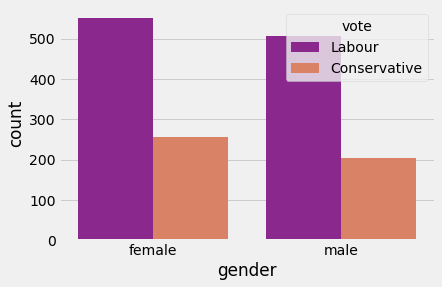

In [313]:

sns.countplot(x="gender", data=df, hue='vote',palette='plasma')

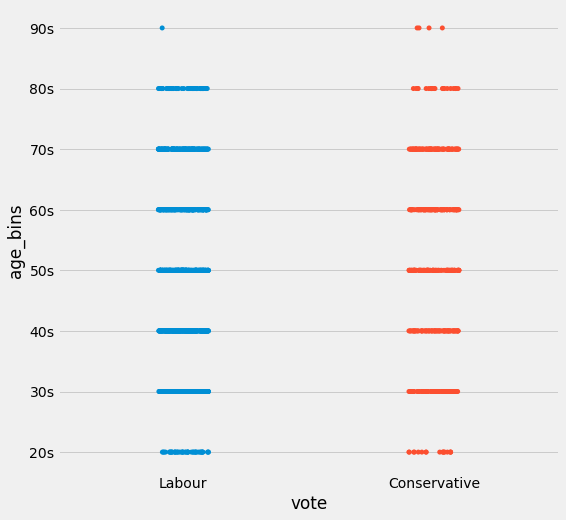

In [314]:
plt.figure(figsize=(8,8))
sns.stripplot(df['vote'], df['age_bins'].sort_values(), jitter=True) 
plt.show()

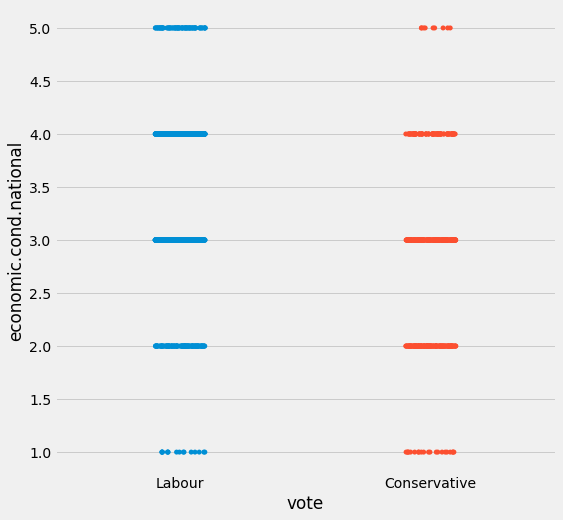

In [315]:
plt.figure(figsize=(8,8))
sns.stripplot(df["vote"], df['economic.cond.national'], jitter=True) 
plt.show()

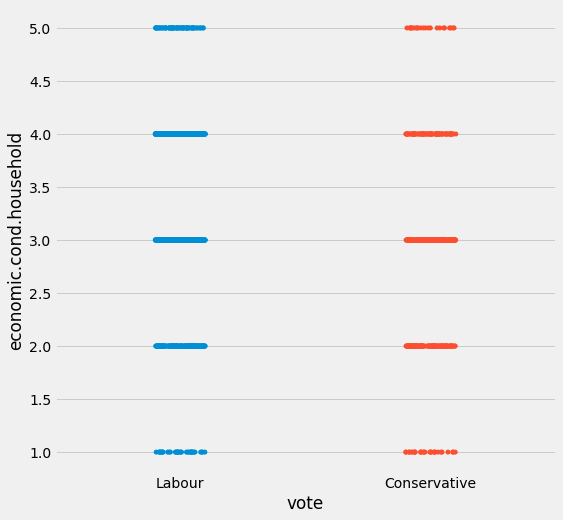

In [316]:
plt.figure(figsize=(8,8))
sns.stripplot(df["vote"], df['economic.cond.household'], jitter=True) 
plt.show()

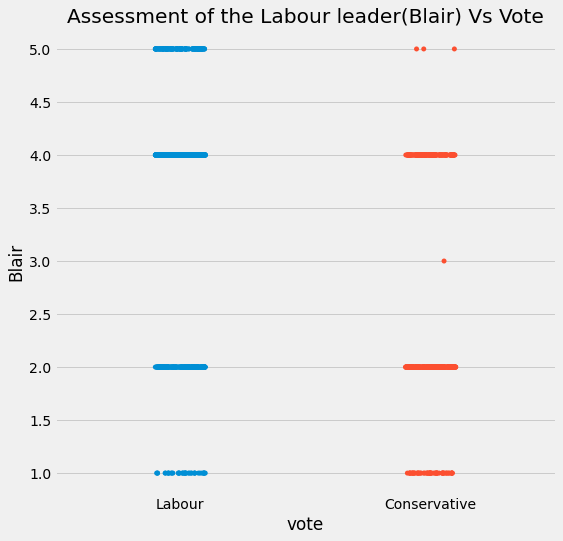

In [317]:
plt.figure(figsize=(8,8))
plt.title('Assessment of the Labour leader(Blair) Vs Vote')
sns.stripplot(df["vote"], df['Blair'], jitter=True) 
plt.show()

**Average Rating for Assessment of the Labour leader(Blair) is good**


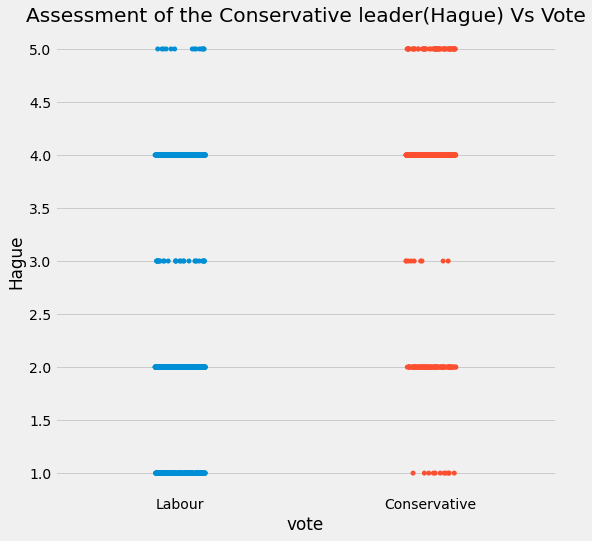

In [318]:
plt.figure(figsize=(8,8))
sns.stripplot(df["vote"], df['Hague'], jitter=True)
plt.title('Assessment of the Conservative leader(Hague) Vs Vote')
plt.show()

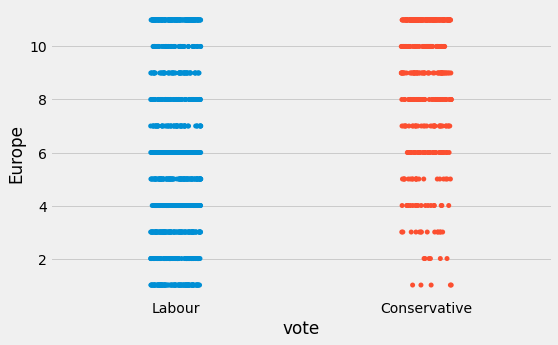

In [319]:
# Europe: an 11-point scale that measures respondents' attitudes toward European integration. 
# High scores represent ‘Eurosceptic’ sentiment.
plt.figure(figsize=(8,5))
sns.stripplot(df["vote"], df['Europe'], jitter=True) 
plt.show()

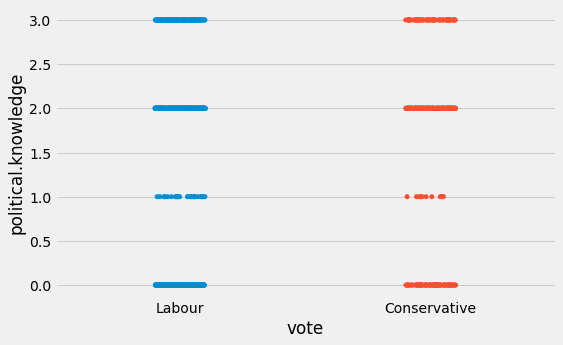

In [320]:
# political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.
plt.figure(figsize=(8,5))
sns.stripplot(df["vote"], df['political.knowledge'], jitter=True) 
plt.show()

#### Checking Correlation

In [321]:
df.corr()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,1.000000,0.018687,-0.038868,0.032084,0.031144,0.064562,-0.046598
economic.cond.national,0.018687,1.000000,0.347687,0.326141,-0.200790,-0.209150,-0.023510
economic.cond.household,-0.038868,0.347687,1.000000,0.215822,-0.100392,-0.112897,-0.038528
Blair,0.032084,0.326141,0.215822,1.000000,-0.243508,-0.295944,-0.021299
Hague,0.031144,-0.200790,-0.100392,-0.243508,1.000000,0.285738,-0.029906
Europe,0.064562,-0.209150,-0.112897,-0.295944,0.285738,1.000000,-0.151197
political.knowledge,-0.046598,-0.023510,-0.038528,-0.021299,-0.029906,-0.151197,1.000000


### Correlation Plot

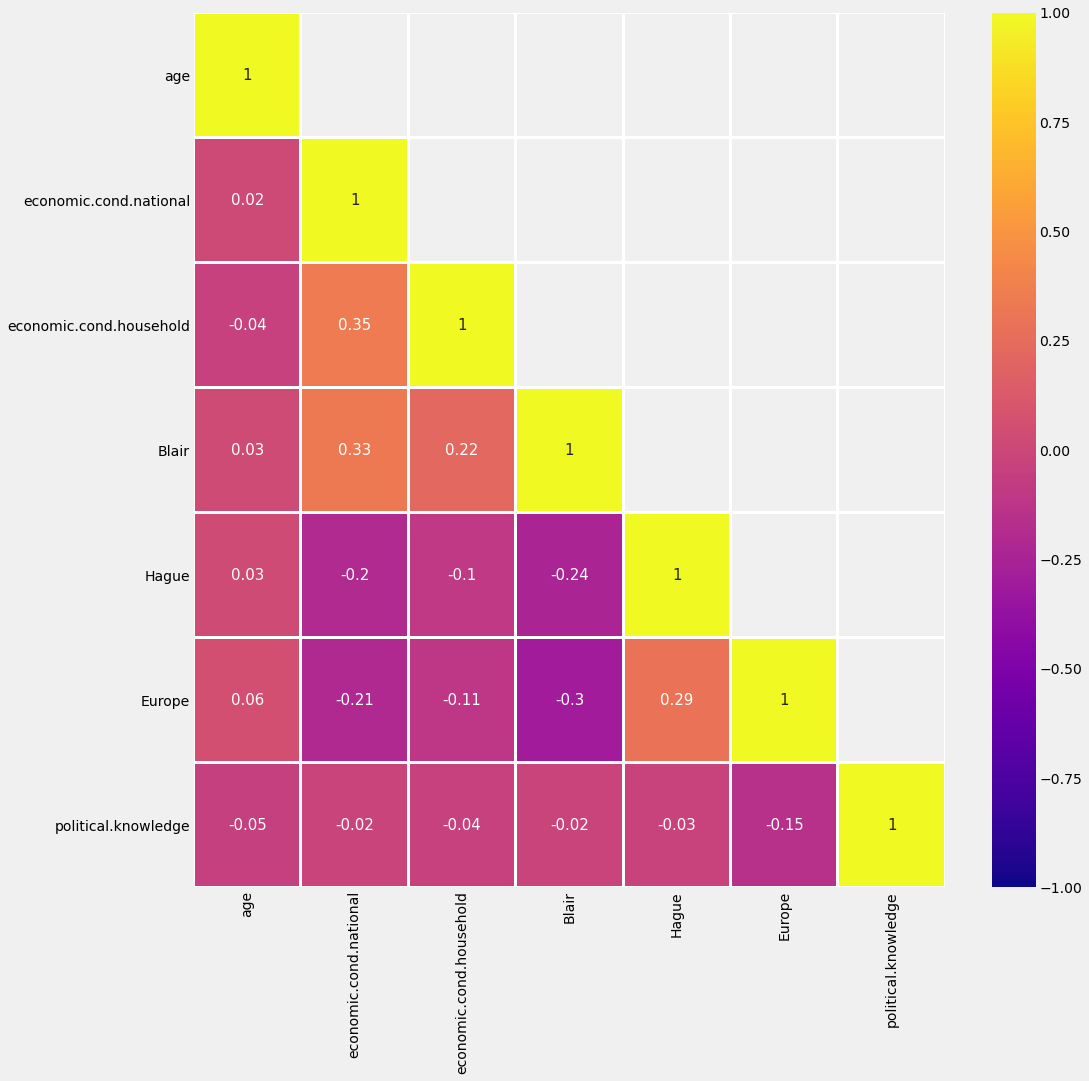

In [322]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr().round(2),annot=True, 
            mask = np.triu(np.ones_like(df.corr()),1),cmap='plasma',
           vmin =-1, vmax=1, linewidths=2, annot_kws={'size':15});


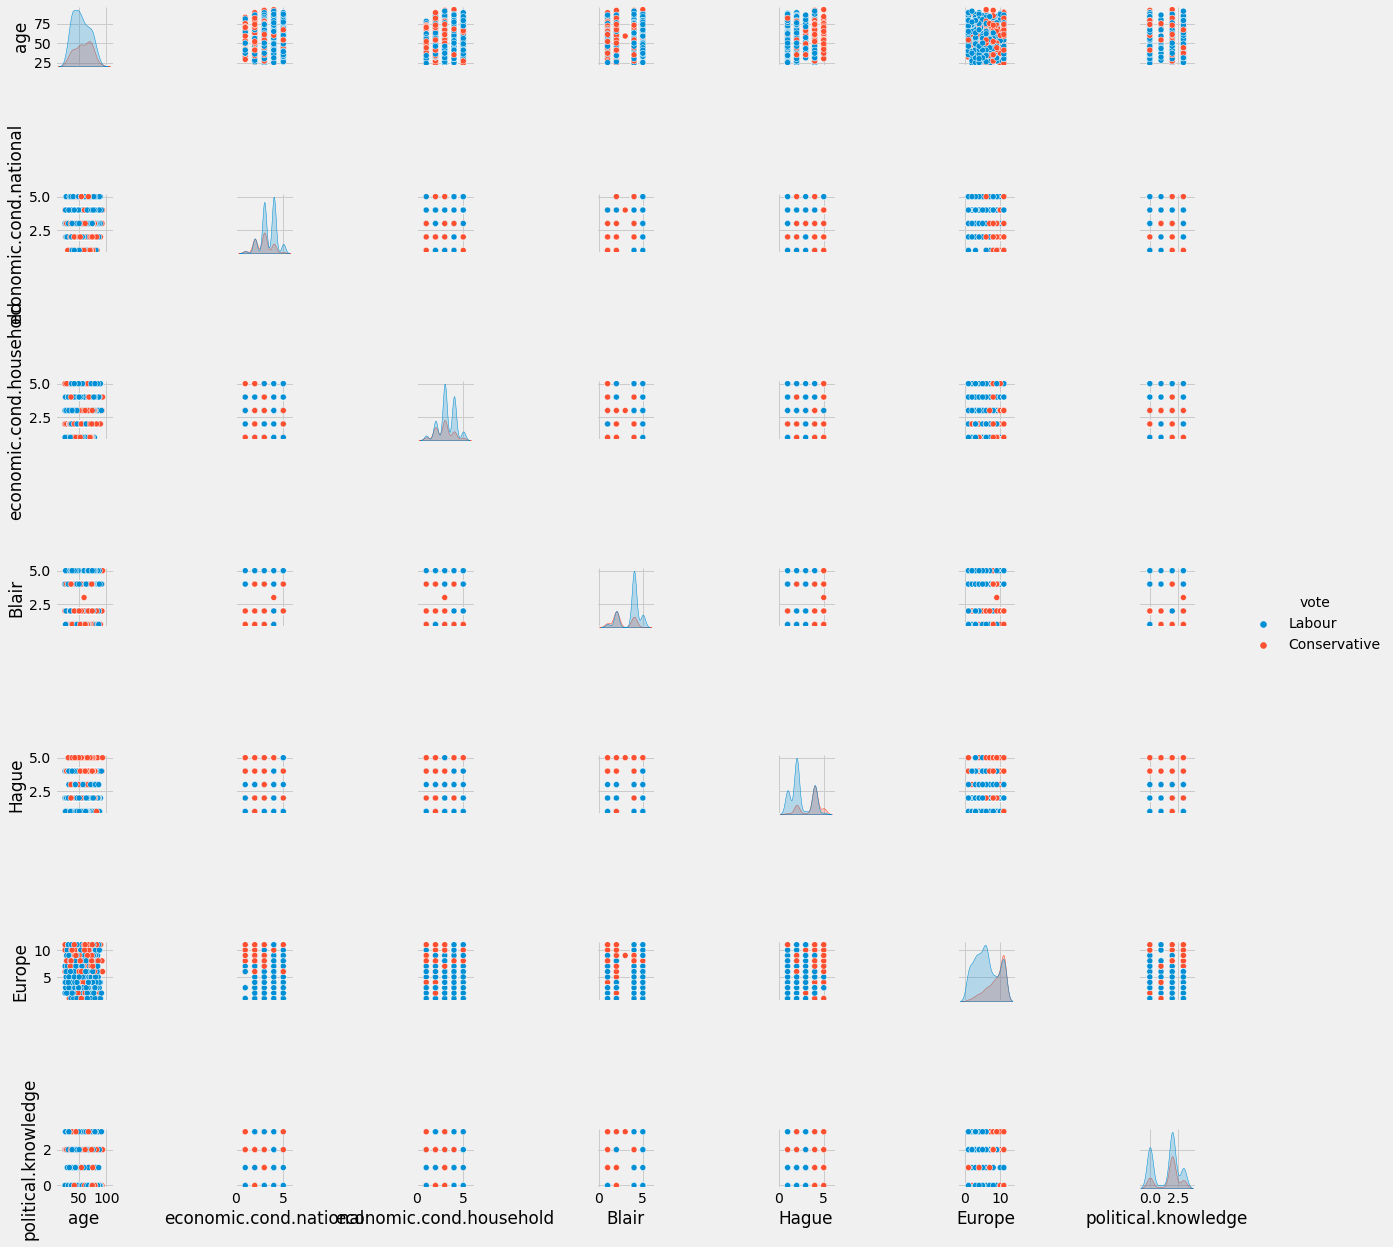

In [323]:
sns.pairplot(df,hue ='vote');

## Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 3 pts), Data Split: Split the data into train and test (70:30) (2 pts).

###  Dummy Variable one hot Encoding for Gender 

In [324]:
df =pd.get_dummies(df, columns=['gender'],drop_first=True)

In [325]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,age_bins,gender_male
0,Labour,43,3,3,4,1,2,2,40s,0
1,Labour,36,4,4,4,4,5,2,30s,1
2,Labour,35,4,4,5,2,3,2,30s,1
3,Labour,24,4,2,2,1,4,0,20s,0
4,Labour,41,2,2,1,1,6,2,40s,1


In [326]:
df.drop("age",axis=1,inplace=True)

In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   vote                     1517 non-null   object  
 1   economic.cond.national   1517 non-null   int64   
 2   economic.cond.household  1517 non-null   int64   
 3   Blair                    1517 non-null   int64   
 4   Hague                    1517 non-null   int64   
 5   Europe                   1517 non-null   int64   
 6   political.knowledge      1517 non-null   int64   
 7   age_bins                 1517 non-null   category
 8   gender_male              1517 non-null   uint8   
dtypes: category(1), int64(6), object(1), uint8(1)
memory usage: 138.2+ KB


### Ordinal Encoding of Age bins

In [328]:
feature = "age_bins"
df["age_bins"] = pd.Categorical(df["age_bins"]).codes

In [329]:
df.head()

,vote,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,age_bins,gender_male
0,Labour,3,3,4,1,2,2,2,0
1,Labour,4,4,4,4,5,2,1,1
2,Labour,4,4,5,2,3,2,1,1
3,Labour,4,2,2,1,4,0,0,0
4,Labour,2,2,1,1,6,2,2,1


### Scaling

In [330]:
num

['age',
 'economic.cond.national',
 'economic.cond.household',
 'Blair',
 'Hague',
 'Europe',
 'political.knowledge']

Text(0.5, 1.0, 'Data Range ')

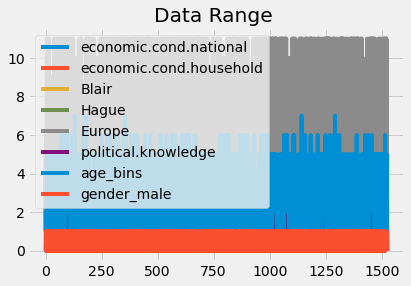

In [483]:
df.plot()
plt.title("Data Range ")

**Since Above figure shows that points rangess are 0 -11 and most of the variables are ordinal variables so there is no need of scaling**

In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   economic.cond.national   1517 non-null   int64 
 2   economic.cond.household  1517 non-null   int64 
 3   Blair                    1517 non-null   int64 
 4   Hague                    1517 non-null   int64 
 5   Europe                   1517 non-null   int64 
 6   political.knowledge      1517 non-null   int64 
 7   age_bins                 1517 non-null   int8  
 8   gender_male              1517 non-null   uint8 
dtypes: int64(6), int8(1), object(1), uint8(1)
memory usage: 137.8+ KB


### Checking the Distributions of class -i.e. Vote 

In [333]:
df.groupby(["vote"]).count()

,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,age_bins,gender_male
vote,,,,,,,,
Conservative,460,460,460,460,460,460,460,460
Labour,1057,1057,1057,1057,1057,1057,1057,1057


### Data Split: Split the data into train and test (70:30)

#### Train-Test Split

In [334]:
# Copy all the predictor variables into X dataframe
X = df.drop('vote', axis=1)

# Copy target into the y dataframe.  
y = df['vote']

In [335]:
X.head()

,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,age_bins,gender_male
0,3,3,4,1,2,2,2,0
1,4,4,4,4,5,2,1,1
2,4,4,5,2,3,2,1,1
3,4,2,2,1,4,0,0,0
4,2,2,1,1,6,2,2,1


In [336]:
y.head()

0    Labour
1    Labour
2    Labour
3    Labour
4    Labour
Name: vote, dtype: object

In [337]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [484]:
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (1061, 8)
X_test:  (456, 8)
y_train:  (1061,)
y_test:  (456,)


## Apply Logistic Regression and LDA (Linear Discriminant Analysis) (3 pts). Interpret the inferences of both model s (2 pts)

### LOGISTIC REGRESSION

In [487]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix,recall_score
import warnings
warnings.filterwarnings('ignore')

In [488]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',
                           max_iter=10000,
                           penalty='none',verbose=True,
                           n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   17.2s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

### Predicting on Training and Test dataset LOGISTIC REGRESSION


In [489]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [490]:
### Getting the Predicted Classes and Probs

In [491]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.430059,0.569941
1,0.153130,0.846870
2,0.006441,0.993559
3,0.832957,0.167043
4,0.072029,0.927971


In [492]:
###  Model Evaluation

In [493]:
# Accuracy - Training Data
LR_train_score= model.score(X_train, y_train)
LR_train_score
LR_train_recall_score_Labour = recall_score(y_train,ytrain_predict,labels=None,pos_label='Labour')
LR_train_recall_score_Conservative = recall_score(y_train,ytrain_predict,labels=None,pos_label='Conservative')
print(LR_train_score,LR_train_recall_score_Conservative,LR_train_recall_score_Labour)

0.8303487276154571 0.6351791530944625 0.9098143236074271


AUC: 0.88993


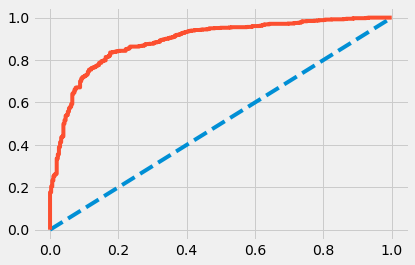

In [494]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.5f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs,pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [495]:
# Accuracy - Test Data
LR_test_score =model.score(X_test, y_test)
LR_test_score
LR_test_recall_score_Labour = recall_score(y_test,ytest_predict,labels=None,pos_label='Labour')
LR_test_recall_score_Conservative = recall_score(y_test,ytest_predict,labels=None,pos_label='Conservative')
print(LR_test_score,LR_test_recall_score_Conservative,LR_test_recall_score_Labour)

0.831140350877193 0.7254901960784313 0.8844884488448845


### AUC and ROC for the test data Logistic Regression

AUC: 0.88332


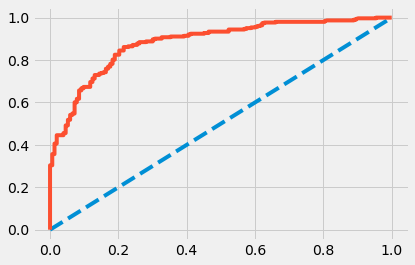

In [496]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.5f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs,pos_label='Labour') 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Confusion Matrix for the training data Logistic Regression

              precision    recall  f1-score   support

Conservative       0.74      0.64      0.68       307
      Labour       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.78      1061
weighted avg       0.83      0.83      0.83      1061



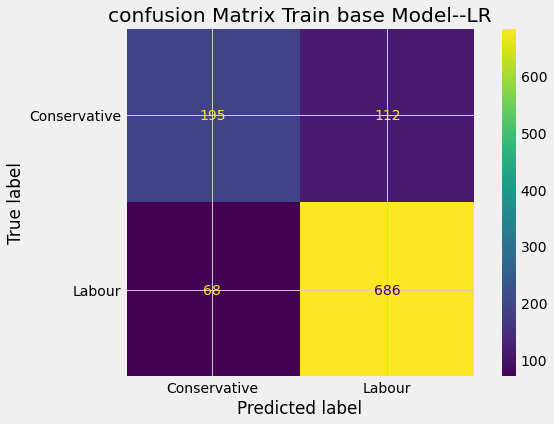

In [497]:
print(classification_report(y_train, ytrain_predict))
fig,ax = plt.subplots(figsize = (8,6))
plt.title("confusion Matrix Train base Model--LR")
plot_confusion_matrix(model,X_train,y_train, ax=ax);

### Confusion Matrix for test data

              precision    recall  f1-score   support

Conservative       0.76      0.73      0.74       153
      Labour       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



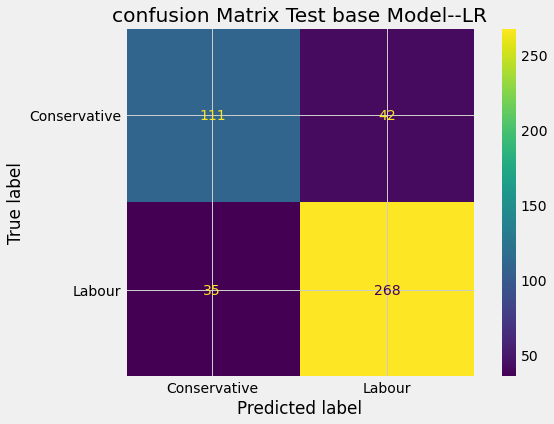

In [498]:
print(classification_report(y_test, ytest_predict))
fig,ax = plt.subplots(figsize = (8,6))
plt.title("confusion Matrix Test base Model--LR")
plot_confusion_matrix(model,X_test,y_test,ax=ax);

0.8899333845981043 0.8833236264802949


Text(0.5, 1.0, 'ROC-AUC Curve Base Model -LR')

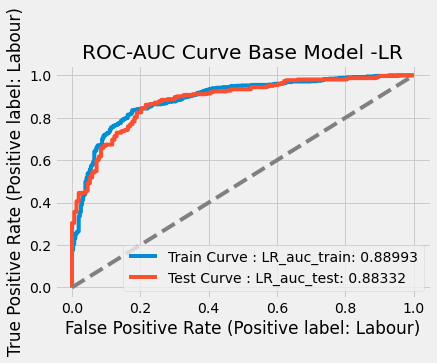

In [499]:
LR_train_predict_prob = model.predict_proba(X_train)
LR_test_predict_prob = model.predict_proba(X_test)
LR_pred_train_prob = model.predict_proba(X_train)
LR_pred_test_prob = model.predict_proba(X_test)

LR_auc_train = roc_auc_score(y_train,LR_train_predict_prob[:,1])
LR_auc_test = roc_auc_score(y_test,LR_test_predict_prob[:,1])
print(LR_auc_train,LR_auc_test)


fig,ax = plt.subplots()
plot_roc_curve(model, X_train,y_train,ax=ax, 
               label = 'Train Curve : LR_auc_train: '+str(round(LR_auc_train,5)));
plot_roc_curve(model, X_test, y_test, ax=ax,
              label = 'Test Curve : LR_auc_test: '+ str(round(LR_auc_test,5)));
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC-AUC Curve Base Model -LR')

### Tuning of Logistic Regression Model

In [500]:
#### Applying GridSearchCV for Logistic Regressio

In [501]:
grid={'penalty':['l2','l1'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [502]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [503]:
grid_search = GridSearchCV(estimator = model, 
                           param_grid = grid, 
                           cv = 3,n_jobs=-1,scoring='accuracy')

In [504]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'l1'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='accuracy')

In [505]:
grid_search.best_params_

{'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001}

In [506]:
grid_search.best_estimator_

LogisticRegression(max_iter=10000, n_jobs=2, solver='sag')

In [507]:
best_model = grid_search.best_estimator_

In [508]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [509]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.429552,0.570448
1,0.154901,0.845099
2,0.006593,0.993407
3,0.830216,0.169784
4,0.073407,0.926593


              precision    recall  f1-score   support

Conservative       0.74      0.64      0.68       307
      Labour       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.78      1061
weighted avg       0.83      0.83      0.83      1061
 



Text(0.5, 1.0, 'Confusion Matrix Train Data of Tuned Model- LR')

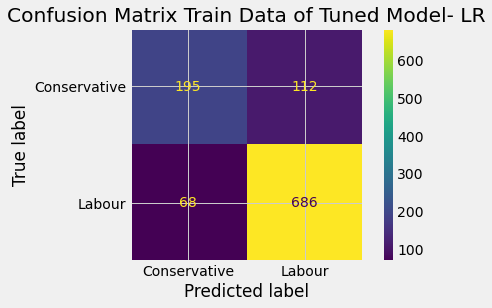

In [510]:
## Confusion matrix on the training data
print(classification_report(y_train, ytrain_predict),'\n');

plot_confusion_matrix(best_model,X_train,y_train);
plt.title('Confusion Matrix Train Data of Tuned Model- LR')

              precision    recall  f1-score   support

Conservative       0.76      0.73      0.74       153
      Labour       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



Text(0.5, 1.0, 'Confusion Matrix Test Data of Tuned Model- LR')

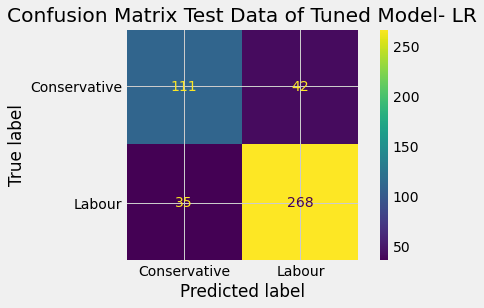

In [511]:
## Confusion matrix & Classification Report on the test data
print(classification_report(y_test, ytest_predict),'\n');
plot_confusion_matrix(best_model,X_test,y_test);
plt.title('Confusion Matrix Test Data of Tuned Model- LR')

0.8900068257026585 0.883366768049354


Text(0.5, 1.0, 'ROC-AUC Curve -LR -Tuned Model')

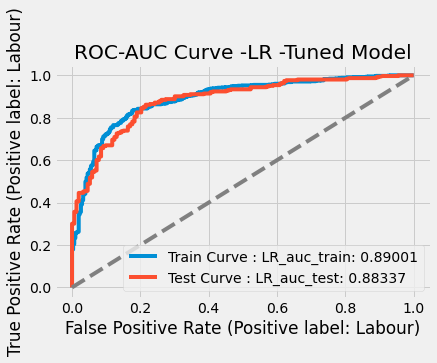

In [512]:
LR_train_predict_prob = best_model.predict_proba(X_train)
LR_test_predict_prob = best_model.predict_proba(X_test)
LR_pred_train_prob = best_model.predict_proba(X_train)
LR_pred_test_prob = best_model.predict_proba(X_test)

LR_auc_train = roc_auc_score(y_train,LR_train_predict_prob[:,1])
LR_auc_test = roc_auc_score(y_test,LR_test_predict_prob[:,1])
print(LR_auc_train,LR_auc_test)


fig,ax = plt.subplots()
plot_roc_curve(best_model, X_train,y_train,ax=ax, 
               label = 'Train Curve : LR_auc_train: '+str(round(LR_auc_train,5)));
plot_roc_curve(best_model, X_test, y_test, ax=ax,
              label = 'Test Curve : LR_auc_test: '+ str(round(LR_auc_test,5)));
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC-AUC Curve -LR -Tuned Model')



### Discriminant Analysis

In [513]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

### Training Performance LDA

In [514]:
## Performance Matrix on train data set
LDA_train_predict = LDA_model.predict(X_train)
LDA_train_score = LDA_model.score(X_train, y_train)
LDA_train_recall_score_Labour = recall_score(y_train,LDA_train_predict,labels=None,pos_label='Labour')
LDA_train_recall_score_Conservative = recall_score(y_train,LDA_train_predict,labels=None,pos_label='Conservative')
print(LDA_train_score,LDA_train_recall_score_Conservative,LDA_train_recall_score_Labour)

0.8331762488218661 0.6514657980456026 0.9071618037135278


In [515]:
LDA_train_predict

array(['Conservative', 'Labour', 'Labour', ..., 'Labour', 'Labour',
       'Labour'], dtype='<U12')

              precision    recall  f1-score   support

Conservative       0.74      0.65      0.69       307
      Labour       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



Text(0.5, 1.0, 'Confusion Matrix on Train Data Base Model -LDA')

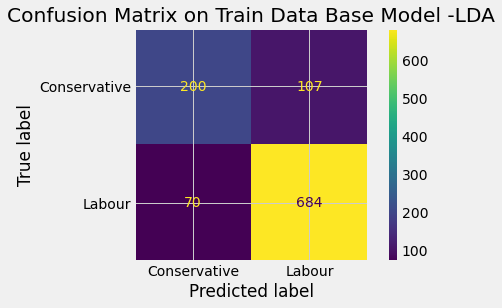

In [516]:
# Confusion Matrix on Train Data -LDA & classification Report
print(classification_report(y_train, LDA_train_predict))
plot_confusion_matrix(LDA_model,X_train,y_train);
plt.title('Confusion Matrix on Train Data Base Model -LDA')

### Test Performance LDA

In [517]:
## Performance Matrix on test data set
LDA_test_predict = LDA_model.predict(X_test)
LDA_test_score = LDA_model.score(X_test, y_test)
LDA_test_recall_score_Labour = recall_score(y_test,LDA_test_predict,labels=None,pos_label='Labour')
LDA_test_recall_score_Conservative = recall_score(y_test,LDA_test_predict,labels=None,pos_label='Conservative')
print(LDA_test_score,LDA_test_recall_score_Conservative,LDA_test_recall_score_Labour)

0.8377192982456141 0.7254901960784313 0.8943894389438944


              precision    recall  f1-score   support

Conservative       0.78      0.73      0.75       153
      Labour       0.87      0.89      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.84      0.84      0.84       456



Text(0.5, 1.0, 'Confusion Matrix on Test Data Base Model -LDA')

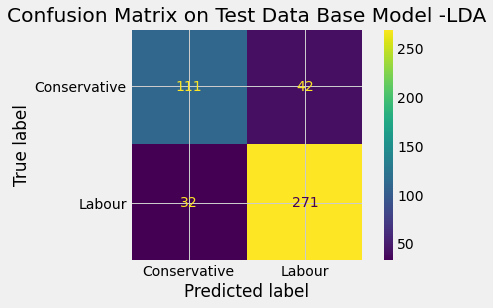

In [518]:
print(classification_report(y_test, LDA_test_predict))
plot_confusion_matrix(LDA_model,X_test,y_test);
plt.title('Confusion Matrix on Test Data Base Model -LDA')

### Probability prediction for the training and test data -LDA


In [519]:
from sklearn.metrics import roc_auc_score,plot_roc_curve
# sklearn.metrics.plot_roc_curve

In [520]:
pred_train_prob = LDA_model.predict_proba(X_train)
pred_test_prob = LDA_model.predict_proba(X_test)

auc_train = roc_auc_score(y_train,pred_train_prob[:,1])
auc_test = roc_auc_score(y_test,pred_test_prob[:,1])

In [521]:
pred_train_prob 
# we are interested in the probability of the class being 1
# hence we will be extracting the second column in the output below
# using pred_train_prob[:,1]
# using pred_train_prob[:,1][0] gives the prob prediction for the first
# row, pred_train_prob[:,1][1] gives the prob prediction for the second
#row and so on. we will use this in a loop below

array([[0.95076594, 0.04923406],
       [0.08683344, 0.91316656],
       [0.31984175, 0.68015825],
       ...,
       [0.22039572, 0.77960428],
       [0.22514368, 0.77485632],
       [0.01674761, 0.98325239]])

Text(0.5, 1.0, 'ROC Curve -LDA Base Model')

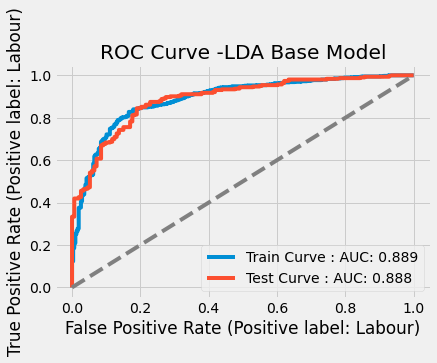

In [522]:
fig,ax = plt.subplots()
plot_roc_curve(LDA_model, X_train,y_train,ax=ax, 
               label = 'Train Curve : AUC: '+str(round(auc_train,3)));
plot_roc_curve(LDA_model, X_test, y_test, ax=ax,
              label = 'Test Curve : AUC: '+ str(round(auc_test,3)));
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC Curve -LDA Base Model')

AUC for the Training Data: 0.889
AUC for the Test Data: 0.888


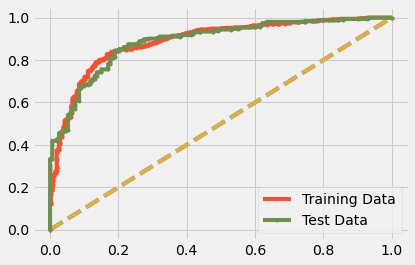

In [523]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_train_prob[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_train_prob[:,1],pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_test_prob[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_test_prob[:,1],pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Changing Default Threshold Probability

In [524]:
from sklearn.metrics import accuracy_score,f1_score, recall_score

In [525]:
thresh = [] # empty list to store threshold values
acc = [] # empty list to store accuracy for various threshold values
f1_scr = [] # empty list to store F1 score for various...
rec = [] # empty list to store recall score for various...

for j in np.arange(0.1,1,0.1):
    thresh.append(j)
    custom_prob = j #defining the custom cut-off/threshold probability value of our choice
    custom_cutoff_data=[]#defining an empty list to store category pred
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if pred_train_prob[:,1][i] > custom_prob:#checking the condition for our probability values to be 
            #greater than the custom cutoff/threshold probability value
            a='Labour' #if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a='Conservative' #if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding category predictions for the given j(cut off) to the list
    acc.append(np.round(accuracy_score(y_train,custom_cutoff_data),3))
    f1_scr.append(np.round(f1_score(y_train,custom_cutoff_data ,labels=None,pos_label= 'Labour'),3))
    rec.append(np.round(recall_score(y_train,custom_cutoff_data,labels=None,pos_label= 'Labour'),3))
    

In [526]:
pd.DataFrame({'Threshold': thresh,
             'Accuracy':acc,
             'F-1 Score': f1_scr,
             'Recall':rec})

,Threshold,Accuracy,F-1 Score,Recall
0,0.1,0.761,0.854,0.987
1,0.2,0.791,0.868,0.968
2,0.3,0.812,0.878,0.952
3,0.4,0.832,0.888,0.939
4,0.5,0.833,0.885,0.907
5,0.6,0.826,0.876,0.870
6,0.7,0.833,0.877,0.838
7,0.8,0.790,0.835,0.751
8,0.9,0.697,0.737,0.599


In [527]:
data_pred_custom_cutoff=[]
for i in range(len(pred_test_prob)):
    if pred_test_prob[:,1][i] > 0.1: # for best recall performace
        a = 'Labour'
    else:
        a = 'Conservative'
    data_pred_custom_cutoff.append(a)

In [528]:
print('Classification Report of the default cut-off test data:\n\n',
      classification_report(y_test,LDA_test_predict),'\n\n\n')

print('Classification Report of the custom cut-off test data:\n\n',
      classification_report(y_test,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

Conservative       0.78      0.73      0.75       153
      Labour       0.87      0.89      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.84      0.84      0.84       456
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

Conservative       0.88      0.24      0.37       153
      Labour       0.72      0.98      0.83       303

    accuracy                           0.73       456
   macro avg       0.80      0.61      0.60       456
weighted avg       0.77      0.73      0.68       456
 



### Applying GridsearchCV IN LDA

In [529]:

grid={'solver':['lsqr','eigen'],
      'n_components':[1,7,2]}
      

In [530]:
model = LinearDiscriminantAnalysis()

In [531]:
grid_search = GridSearchCV(estimator = model, 
                           param_grid = grid, 
                           cv = 5,n_jobs=-1)



In [532]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'n_components': [1, 7, 2],
                         'solver': ['lsqr', 'eigen']})

In [533]:
grid_search.best_params_

{'n_components': 1, 'solver': 'lsqr'}

In [534]:
grid_search.best_estimator_

LinearDiscriminantAnalysis(n_components=1, solver='lsqr')

In [535]:
best_model = grid_search.best_estimator_

In [536]:
best_model

LinearDiscriminantAnalysis(n_components=1, solver='lsqr')

In [537]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [538]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.472249,0.527751
1,0.138578,0.861422
2,0.005601,0.994399
3,0.857034,0.142966
4,0.060017,0.939983


              precision    recall  f1-score   support

Conservative       0.74      0.65      0.69       307
      Labour       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 



Text(0.5, 1.0, 'Confusion Matrx of Train data Tuned LDA Model')

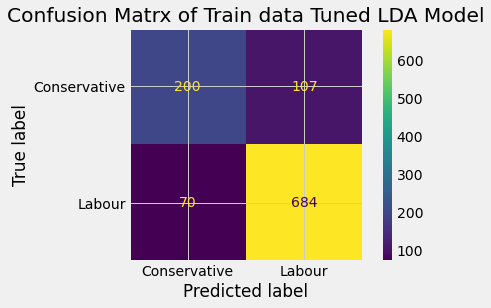

In [539]:
## Confusion matrix on the training data
print(classification_report(y_train, ytrain_predict),'\n');
plot_confusion_matrix(best_model,X_train,y_train,cmap='viridis');
plt.title('Confusion Matrx of Train data Tuned LDA Model')

              precision    recall  f1-score   support

Conservative       0.78      0.73      0.75       153
      Labour       0.87      0.89      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.84      0.84      0.84       456
 



Text(0.5, 1.0, 'Confusion Matrx of Test data Tuned LDA Model')

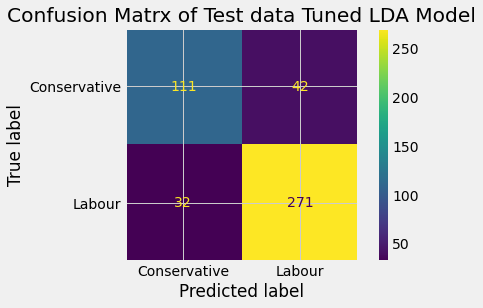

In [540]:
## Confusion matrix on the test data
print(classification_report(y_test, ytest_predict),'\n');
plot_confusion_matrix(best_model,X_test,y_test);
plt.title('Confusion Matrx of Test data Tuned LDA Model')

Text(0.5, 1.0, 'ROC Curve -LDA Tuned Model')

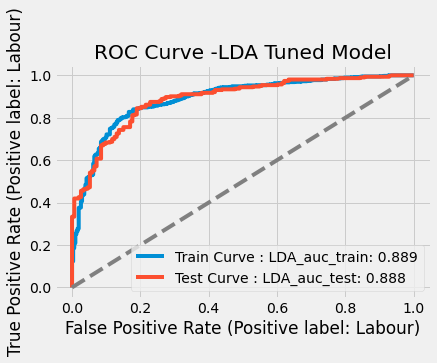

In [541]:
LDA_pred_train_prob = best_model.predict_proba(X_train)
LDA_pred_test_prob = best_model.predict_proba(X_test)

LDA_auc_train = roc_auc_score(y_train,pred_train_prob[:,1])
LDA_auc_test = roc_auc_score(y_test,pred_test_prob[:,1])

fig,ax = plt.subplots()
plot_roc_curve(best_model, X_train,y_train,ax=ax, 
               label = 'Train Curve : LDA_auc_train: '+str(round(LDA_auc_train,3)));
plot_roc_curve(best_model, X_test, y_test, ax=ax,
              label = 'Test Curve : LDA_auc_test: '+ str(round(LDA_auc_test,3)));
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC Curve -LDA Tuned Model')

.

## Apply KNN Model and Naïve Bayes Model(5 pts). Interpret the inferences of each model (2 pts)

### KNN Model

In [392]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

### Training Performance

In [393]:
## Performance Matrix on train data set
KNN_train_predict = KNN_model.predict(X_train)
KNN_train_score = KNN_model.score(X_train, y_train)
KNN_train_recall_score_Labour = recall_score(y_train,KNN_train_predict,labels=None,pos_label = 'Labour')
KNN_train_recall_score_Conservative = recall_score(y_train,KNN_train_predict,labels=None,pos_label = 'Conservative')
print(KNN_train_score,KNN_train_recall_score_Conservative,KNN_train_recall_score_Labour)

0.8567389255419415 0.7035830618892508 0.9190981432360743


              precision    recall  f1-score   support

Conservative       0.78      0.70      0.74       307
      Labour       0.88      0.92      0.90       754

    accuracy                           0.86      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.86      0.85      1061



Text(0.5, 1.0, 'Confusion Matrix - Train KNN-Base Model')

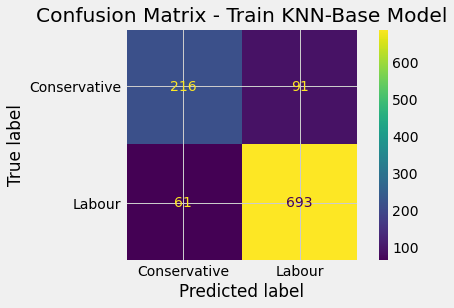

In [394]:
print(classification_report(y_train, KNN_train_predict))
plot_confusion_matrix(KNN_model,X_train,y_train);
plt.title('Confusion Matrix - Train KNN-Base Model')

### Test Performance

In [395]:
## Performance Matrix on test data set
KNN_test_predict = KNN_model.predict(X_test)
KNN_test_score = KNN_model.score(X_test, y_test)
KNN_test_recall_score_Labour = recall_score(y_test,KNN_test_predict,labels=None,pos_label = 'Labour')
KNN_test_recall_score_Conservative  = recall_score(y_test,KNN_test_predict,labels=None,pos_label = 'Conservative')
print(KNN_test_score,KNN_test_recall_score_Conservative,KNN_test_recall_score_Labour)

0.8048245614035088 0.6405228758169934 0.8877887788778878


              precision    recall  f1-score   support

Conservative       0.74      0.64      0.69       153
      Labour       0.83      0.89      0.86       303

    accuracy                           0.80       456
   macro avg       0.79      0.76      0.77       456
weighted avg       0.80      0.80      0.80       456



Text(0.5, 1.0, 'Confusion Matrix - Test KNN-Base Model')

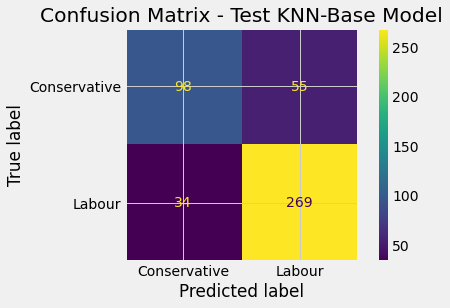

In [396]:
print(classification_report(y_test, KNN_test_predict))
plot_confusion_matrix(KNN_model,X_test, y_test);
plt.title('Confusion Matrix - Test KNN-Base Model')

Text(0.5, 1.0, 'ROC Curve -KNN Base Model')

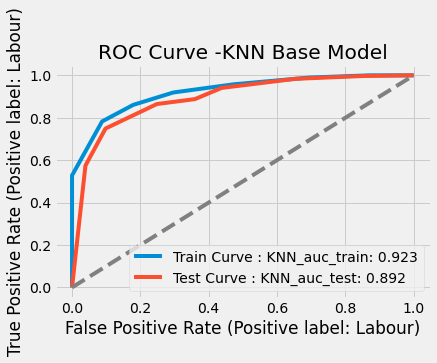

In [397]:
KNN_pred_train_prob = KNN_model.predict_proba(X_train)
KNN_pred_test_prob = KNN_model.predict_proba(X_test)

KNN_auc_train = roc_auc_score(y_train,KNN_pred_train_prob[:,1])
KNN_auc_test = roc_auc_score(y_test,KNN_pred_test_prob[:,1])

fig,ax = plt.subplots()
plot_roc_curve(KNN_model, X_train,y_train,ax=ax, 
               label = 'Train Curve : KNN_auc_train: '+str(round(KNN_auc_train,3)));
plot_roc_curve(KNN_model, X_test, y_test, ax=ax,
              label = 'Test Curve : KNN_auc_test: '+ str(round(KNN_auc_test,3)));
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC Curve -KNN Base Model')

### TUNING OF KNN MODEL WITH LESS MISCLASSIFICATION ERROR

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from K=1,3,5,7....19 using the Mis classification error

 Misclassification error (MCE) = 1 - Test accuracy score. Calculated MCE for each model with neighbours = 1,3,5...19 and find the model with lowest MCE

In [398]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores] # this technique is called list comprehension
MCE

[0.21052631578947367,
 0.1907894736842105,
 0.17982456140350878,
 0.19517543859649122,
 0.18201754385964908,
 0.1885964912280702,
 0.1864035087719298,
 0.17105263157894735,
 0.16885964912280704,
 0.17105263157894735]

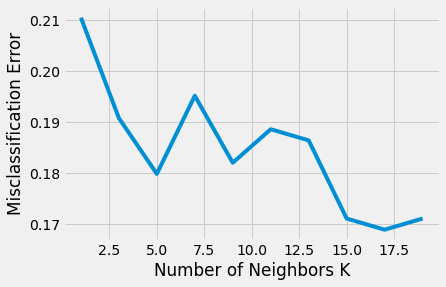

In [399]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

**Misclassification Error is low at K =15 so we will take 15 Neighbors**

In [400]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=17)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

### Training Performance

In [401]:
## Performance Matrix on train data set
KNN_train_predict = KNN_model.predict(X_train)
KNN_train_score = KNN_model.score(X_train, y_train)
KNN_train_recall_score_Labour = recall_score(y_train,KNN_train_predict,labels=None,pos_label = 'Labour')
KNN_train_recall_score_Conservative = recall_score(y_train,KNN_train_predict,labels=None,pos_label = 'Conservative')
print(KNN_train_score,KNN_train_recall_score_Conservative,KNN_train_recall_score_Labour)

0.8388312912346843 0.6840390879478827 0.9018567639257294


              precision    recall  f1-score   support

Conservative       0.74      0.68      0.71       307
      Labour       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061



Text(0.5, 1.0, 'Confusion Matrix Train KNN Tuned Model')

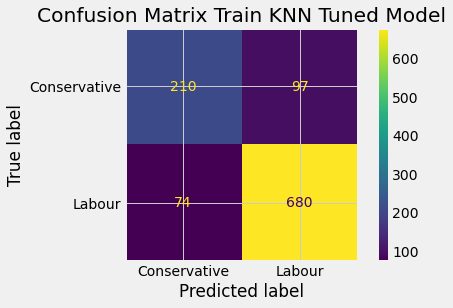

In [402]:
print(classification_report(y_train, KNN_train_predict))
plot_confusion_matrix(KNN_model,X_train,y_train);
plt.title('Confusion Matrix Train KNN Tuned Model')

### Test Performance

In [403]:
## Performance Matrix on test data set
KNN_test_predict = KNN_model.predict(X_test)
KNN_test_score = KNN_model.score(X_test, y_test)
KNN_test_recall_score_Labour = recall_score(y_test,KNN_test_predict,labels=None,pos_label = 'Labour')
KNN_test_recall_score_Conservative  = recall_score(y_test,KNN_test_predict,labels=None,pos_label = 'Conservative')
print(KNN_test_score,KNN_test_recall_score_Conservative,KNN_test_recall_score_Labour)

0.831140350877193 0.6797385620915033 0.9075907590759076


              precision    recall  f1-score   support

Conservative       0.79      0.68      0.73       153
      Labour       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



Text(0.5, 1.0, 'Confusion Matrix Train KNN Tuned Model')

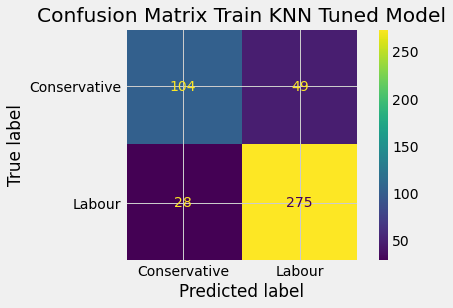

In [404]:
print(classification_report(y_test, KNN_test_predict))
plot_confusion_matrix(KNN_model,X_test, y_test);
plt.title('Confusion Matrix Train KNN Tuned Model')

Text(0.5, 1.0, 'ROC Curve -KNN Tuned Model')

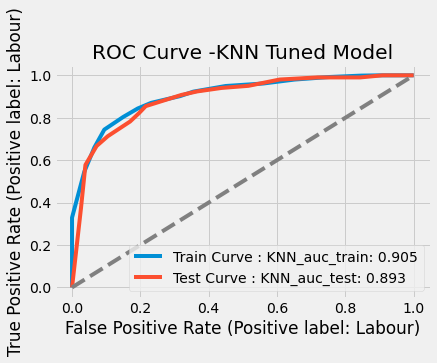

In [405]:
KNN_pred_train_prob = KNN_model.predict_proba(X_train)
KNN_pred_test_prob = KNN_model.predict_proba(X_test)

KNN_auc_train = roc_auc_score(y_train,KNN_pred_train_prob[:,1])
KNN_auc_test = roc_auc_score(y_test,KNN_pred_test_prob[:,1])

fig,ax = plt.subplots()
plot_roc_curve(KNN_model, X_train,y_train,ax=ax, 
               label = 'Train Curve : KNN_auc_train: '+str(round(KNN_auc_train,3)));
plot_roc_curve(KNN_model, X_test, y_test, ax=ax,
              label = 'Test Curve : KNN_auc_test: '+ str(round(KNN_auc_test,3)));
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC Curve -KNN Tuned Model')

### Naive Bayes Model

In [406]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix, classification_report, recall_score

In [407]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

### Training Performance

In [408]:
## Performance Matrix on train data set
NB_train_predict = NB_model.predict(X_train)
NB_train_score = NB_model.score(X_train, y_train)
NB_train_recall_score_Labour = recall_score(y_train,NB_train_predict,labels=None,pos_label='Labour')
NB_train_recall_score_Conservative = recall_score(y_train,NB_train_predict,labels=None,pos_label='Conservative')
print(NB_train_score,NB_train_recall_score_Conservative,NB_train_recall_score_Labour)

0.8360037700282752 0.6938110749185668 0.8938992042440318


              precision    recall  f1-score   support

Conservative       0.73      0.69      0.71       307
      Labour       0.88      0.89      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



Text(0.5, 1.0, 'Confusion Matrix of Train- Base Model NB')

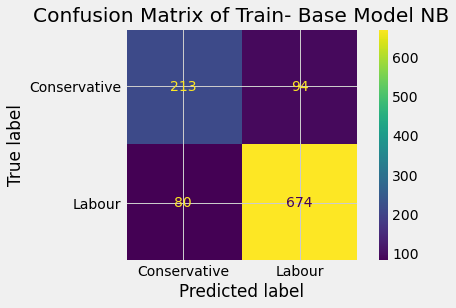

In [486]:
print(classification_report(y_train, NB_train_predict))
plot_confusion_matrix(NB_model,X_train,y_train);
plt.title('Confusion Matrix of Train- Base Model NB')

### Test Performance

In [410]:
## Performance Matrix on test data set
NB_test_predict = NB_model.predict(X_test)
NB_test_score = NB_model.score(X_test, y_test)
NB_test_recall_score_Labour = recall_score(y_test,NB_test_predict,labels=None,pos_label='Labour')
NB_test_recall_score_Conservative = recall_score(y_test,NB_test_predict,labels=None,pos_label='Conservative')
print(NB_test_score,NB_test_recall_score_Conservative,NB_test_recall_score_Labour)

0.8201754385964912 0.7254901960784313 0.8679867986798679


              precision    recall  f1-score   support

Conservative       0.74      0.73      0.73       153
      Labour       0.86      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



Text(0.5, 1.0, 'Confusion Matrix of Test- Base Model NB')

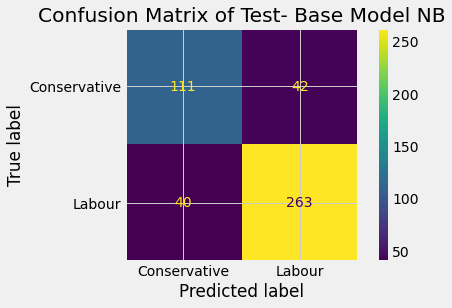

In [485]:
print(classification_report(y_test, NB_test_predict))
plot_confusion_matrix(NB_model, X_test, y_test);
plt.title('Confusion Matrix of Test- Base Model NB')

Text(0.5, 1.0, 'ROC Curve -NB Base Model')

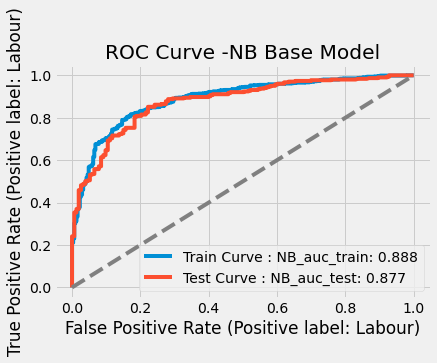

In [412]:
NB_pred_train_prob = NB_model.predict_proba(X_train)
NB_pred_test_prob = NB_model.predict_proba(X_test)

NB_auc_train = roc_auc_score(y_train,NB_pred_train_prob[:,1])
NB_auc_test = roc_auc_score(y_test,NB_pred_test_prob[:,1])

fig,ax = plt.subplots()
plot_roc_curve(NB_model, X_train,y_train,ax=ax, 
               label = 'Train Curve : NB_auc_train: '+str(round(NB_auc_train,3)));
plot_roc_curve(NB_model, X_test, y_test, ax=ax,
              label = 'Test Curve : NB_auc_test: '+ str(round(NB_auc_test,3)));
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC Curve -NB Base Model')

.

## Model Tuning (2 pts) , Bagging ( 2.5 pts) and Boosting (2.5 pts).

### Bagging on Naive Bays Classifier and on random forrest it's given after this question

In [413]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
#RF_model=RandomForestClassifier(n_estimators=100,random_state=1)

Bagging_model=BaggingClassifier(base_estimator=NB_model,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=GaussianNB(), n_estimators=100, random_state=1)

### Training Performance

In [414]:
## Performance Matrix on train data set
Bagging_train_predict = Bagging_model.predict(X_train)
Bagging_train_score =Bagging_model.score(X_train, y_train)
Bagging_train_recall_score_Labour = recall_score(y_train,Bagging_train_predict,labels=None,pos_label = 'Labour')
Bagging_train_recall_score_Conservative = recall_score(y_train,Bagging_train_predict,labels=None,pos_label = 'Conservative')
print(Bagging_train_score,Bagging_train_recall_score_Conservative, Bagging_train_recall_score_Labour)

0.8350612629594723 0.6872964169381107 0.8952254641909815


              precision    recall  f1-score   support

Conservative       0.73      0.69      0.71       307
      Labour       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



Text(0.5, 1.0, 'Confusion Matrx- Train Bagging with Naive Bays')

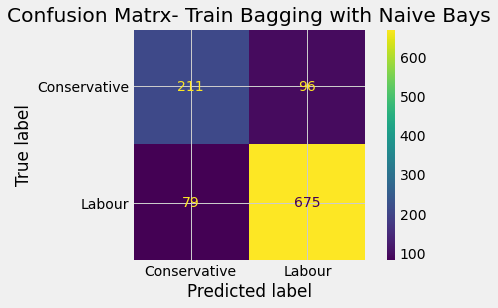

In [415]:
print(classification_report(y_train, Bagging_train_predict))
plot_confusion_matrix(Bagging_model,X_train, y_train);
plt.title('Confusion Matrx- Train Bagging with Naive Bays')

### Test Performance

In [416]:
## Performance Matrix on test data set
Bagging_test_predict = Bagging_model.predict(X_test)
Bagging_test_score = Bagging_model.score(X_test, y_test)
Bagging_test_recall_score_Labour = recall_score(y_test, Bagging_test_predict,labels=None,pos_label = 'Labour')
Bagging_test_recall_score_Conservative = recall_score(y_test, Bagging_test_predict,labels=None,pos_label = 'Conservative')
                                                
print(Bagging_test_score,Bagging_test_recall_score_Conservative, Bagging_test_recall_score_Labour)

0.8223684210526315 0.7254901960784313 0.8712871287128713


              precision    recall  f1-score   support

Conservative       0.74      0.73      0.73       153
      Labour       0.86      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



Text(0.5, 1.0, 'Confusion Matrx- Test Bagging with Naive Bays')

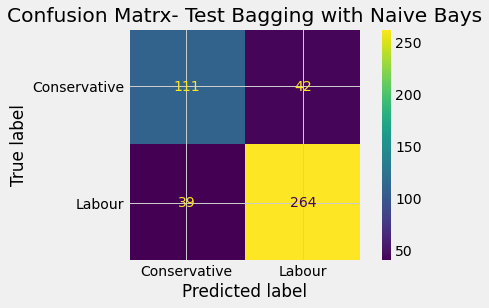

In [417]:
print(classification_report(y_test, Bagging_test_predict))
plot_confusion_matrix(Bagging_model,X_test,y_test);
plt.title('Confusion Matrx- Test Bagging with Naive Bays')

Text(0.5, 1.0, 'ROC Curve -NB -Bagging Model')

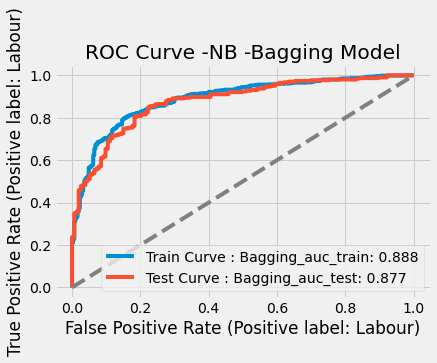

In [418]:
Bagging_pred_train_prob = Bagging_model.predict_proba(X_train)
Bagging_pred_test_prob = Bagging_model.predict_proba(X_test)

Bagging_auc_train = roc_auc_score(y_train,Bagging_pred_train_prob[:,1])
Bagging_auc_test = roc_auc_score(y_test,Bagging_pred_test_prob[:,1])

fig,ax = plt.subplots()
plot_roc_curve(Bagging_model, X_train,y_train,ax=ax, 
               label = 'Train Curve : Bagging_auc_train: '+str(round(Bagging_auc_train,3)));
plot_roc_curve(Bagging_model, X_test, y_test, ax=ax,
              label = 'Test Curve : Bagging_auc_test: '+ str(round(Bagging_auc_test,3)));
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC Curve -NB -Bagging Model')

### Random Forest

In [419]:

from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

### Training Performance

In [420]:
## Performance Matrix on train data set
RF_train_predict = RF_model.predict(X_train)
RF_train_score =RF_model.score(X_train, y_train)
RF_train_recall_score_Labour = recall_score(y_train,RF_train_predict,labels=None,pos_label = 'Labour')
RF_train_recall_score_Conservative = recall_score(y_train,RF_train_predict,labels=None,pos_label = 'Conservative')
print(RF_train_score,RF_train_recall_score_Conservative,RF_train_recall_score_Labour)

0.9924599434495759 0.9837133550488599 0.9960212201591512


              precision    recall  f1-score   support

Conservative       0.99      0.98      0.99       307
      Labour       0.99      1.00      0.99       754

    accuracy                           0.99      1061
   macro avg       0.99      0.99      0.99      1061
weighted avg       0.99      0.99      0.99      1061



Text(0.5, 1.0, 'RF-Train Confusion Matrix')

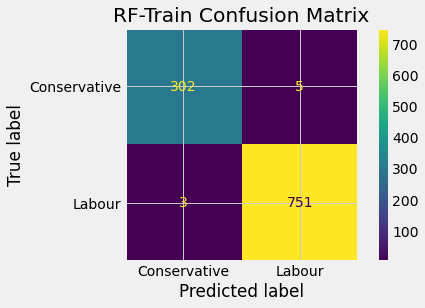

In [421]:
print(classification_report(y_train, RF_train_predict))
plot_confusion_matrix(RF_model, X_train,y_train);
plt.title('RF-Train Confusion Matrix')

### Test Performace

In [422]:
## Performance Matrix on test data set
RF_test_predict = RF_model.predict(X_test)
RF_test_score = RF_model.score(X_test, y_test)
RF_test_recall_score_Labour = recall_score(y_test, RF_test_predict,labels=None,pos_label = 'Labour')
RF_test_recall_score_Conservative = recall_score(y_test, RF_test_predict,labels=None,pos_label = 'Conservative')
print(RF_test_score,RF_test_recall_score_Conservative,RF_test_recall_score_Labour)

0.8114035087719298 0.6405228758169934 0.8976897689768977


              precision    recall  f1-score   support

Conservative       0.76      0.64      0.70       153
      Labour       0.83      0.90      0.86       303

    accuracy                           0.81       456
   macro avg       0.80      0.77      0.78       456
weighted avg       0.81      0.81      0.81       456



Text(0.5, 1.0, 'RF-Test Confusion Matrix')

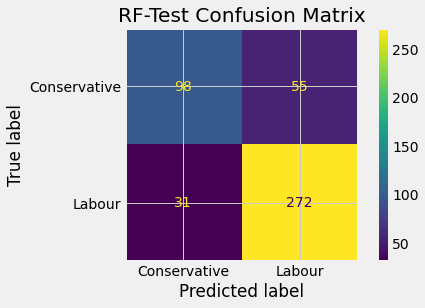

In [423]:
print(classification_report(y_test, RF_test_predict))
plot_confusion_matrix(RF_model,X_test,y_test);
plt.title('RF-Test Confusion Matrix')

### Bagging

In [424]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier(n_estimators=100,random_state=1)

Bagging_model=BaggingClassifier(base_estimator=RF_model,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1),
                  n_estimators=100, random_state=1)

### Training Performance

In [425]:
## Performance Matrix on train data set
Bagging_train_predict = Bagging_model.predict(X_train)
Bagging_train_score =Bagging_model.score(X_train, y_train)
Bagging_train_recall_score_Labour = recall_score(y_train,Bagging_train_predict,labels=None,pos_label = 'Labour')
Bagging_train_recall_score_Conservative = recall_score(y_train,Bagging_train_predict,labels=None,pos_label = 'Conservative')
print(Bagging_train_score,Bagging_train_recall_score_Conservative, Bagging_train_recall_score_Labour)

0.9613572101790764 0.8859934853420195 0.9920424403183024


              precision    recall  f1-score   support

Conservative       0.98      0.89      0.93       307
      Labour       0.96      0.99      0.97       754

    accuracy                           0.96      1061
   macro avg       0.97      0.94      0.95      1061
weighted avg       0.96      0.96      0.96      1061



Text(0.5, 1.0, 'Confusiuon Matrix Bagging -Random forest Model')

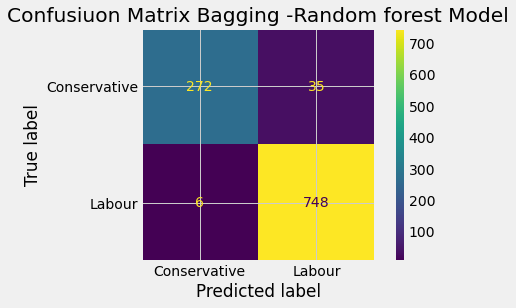

In [426]:
print(classification_report(y_train, Bagging_train_predict))
plot_confusion_matrix(Bagging_model,X_train, y_train);
plt.title('Confusiuon Matrix Bagging -Random forest Model')

### Test Performance

In [427]:
## Performance Matrix on test data set
Bagging_test_predict = Bagging_model.predict(X_test)
Bagging_test_score = Bagging_model.score(X_test, y_test)
Bagging_test_recall_score_Labour = recall_score(y_test, Bagging_test_predict,labels=None,pos_label = 'Labour')
Bagging_test_recall_score_Conservative = recall_score(y_test, Bagging_test_predict,labels=None,pos_label = 'Conservative')
                                                
print(Bagging_test_score,Bagging_test_recall_score_Conservative, Bagging_test_recall_score_Labour)

0.8289473684210527 0.673202614379085 0.9075907590759076


              precision    recall  f1-score   support

Conservative       0.79      0.67      0.73       153
      Labour       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



Text(0.5, 1.0, 'Confusiuon Matrix Bagging  Test -Random forest Model')

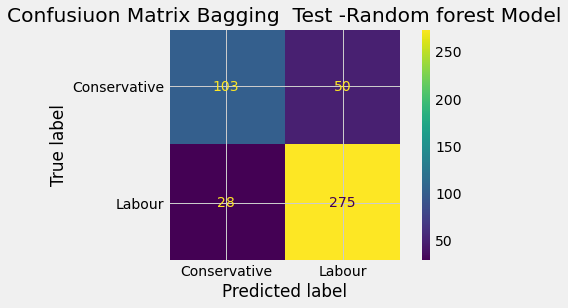

In [428]:
print(classification_report(y_test, Bagging_test_predict))
plot_confusion_matrix(Bagging_model,X_test,y_test);
plt.title('Confusiuon Matrix Bagging  Test -Random forest Model')

Text(0.5, 1.0, 'ROC Curve -RF -Bagging Model')

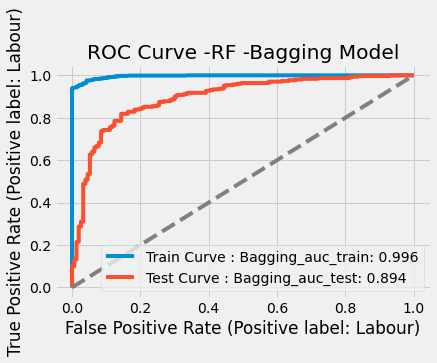

In [429]:
Bagging_pred_train_prob = Bagging_model.predict_proba(X_train)
Bagging_pred_test_prob = Bagging_model.predict_proba(X_test)

Bagging_auc_train = roc_auc_score(y_train,Bagging_pred_train_prob[:,1])
Bagging_auc_test = roc_auc_score(y_test,Bagging_pred_test_prob[:,1])

fig,ax = plt.subplots()
plot_roc_curve(Bagging_model, X_train,y_train,ax=ax, 
               label = 'Train Curve : Bagging_auc_train: '+str(round(Bagging_auc_train,3)));
plot_roc_curve(Bagging_model, X_test, y_test, ax=ax,
              label = 'Test Curve : Bagging_auc_test: '+ str(round(Bagging_auc_test,3)));
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC Curve -RF -Bagging Model')

### Ada Boost

In [430]:
from sklearn.ensemble import AdaBoostClassifier

In [431]:
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

### Training Performance

In [432]:
## Performance Matrix on train data set
ADB_train_predict = ADB_model.predict(X_train)
ADB_train_score = ADB_model.score(X_train, y_train)
ADB_train_recall_score_Labour = recall_score(y_train,ADB_train_predict,labels=None,pos_label='Labour')
ADB_train_recall_score_Conservative = recall_score(y_train,ADB_train_predict,labels=None,pos_label='Conservative')
print(ADB_train_score,ADB_train_recall_score_Conservative,ADB_train_recall_score_Labour)

0.8407163053722903 0.6807817589576547 0.9058355437665783


              precision    recall  f1-score   support

Conservative       0.75      0.68      0.71       307
      Labour       0.87      0.91      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061



Text(0.5, 1.0, 'Adaboost Classifier -Train Confusion Matrix')

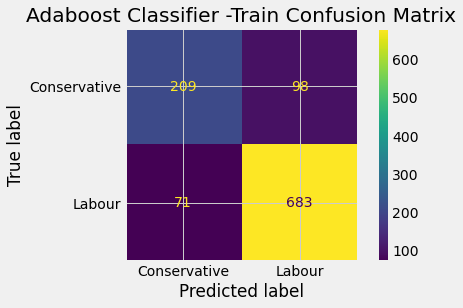

In [433]:
print(classification_report(y_train, ADB_train_predict))
plot_confusion_matrix(ADB_model,X_train,y_train);
plt.title('Adaboost Classifier -Train Confusion Matrix')

### Test Performance

In [434]:
## Performance Matrix on test data set
ADB_test_predict = ADB_model.predict(X_test)
ADB_test_score = ADB_model.score(X_test, y_test)
ADB_test_recall_score_Labour = recall_score(y_test,ADB_test_predict,labels=None,pos_label='Labour')
ADB_test_recall_score_Conservative = recall_score(y_test,ADB_test_predict,labels=None,pos_label='Conservative')
print(ADB_test_score,ADB_test_recall_score_Conservative,ADB_test_recall_score_Labour)

0.8223684210526315 0.6928104575163399 0.8877887788778878


              precision    recall  f1-score   support

Conservative       0.76      0.69      0.72       153
      Labour       0.85      0.89      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456



Text(0.5, 1.0, 'Adaboost Classifier -Test Confusion Matrix')

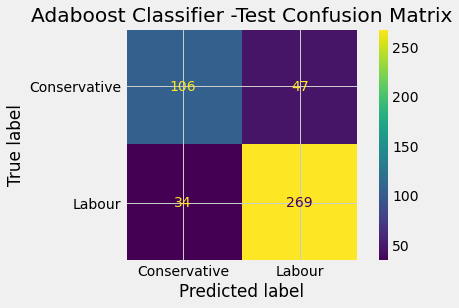

In [435]:
print(classification_report(y_test, ADB_test_predict))
plot_confusion_matrix(ADB_model,X_test,y_test);
plt.title('Adaboost Classifier -Test Confusion Matrix')

Text(0.5, 1.0, 'ROC Curve -ADA-Boost Model')

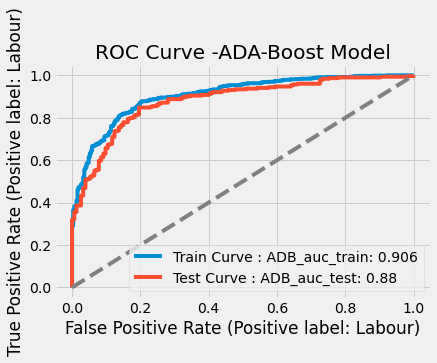

In [436]:
ADB_pred_train_prob = ADB_model.predict_proba(X_train)
ADB_pred_test_prob = ADB_model.predict_proba(X_test)

ADB_auc_train = roc_auc_score(y_train,ADB_pred_train_prob[:,1])
ADB_auc_test = roc_auc_score(y_test,ADB_pred_test_prob[:,1])

fig,ax = plt.subplots()
plot_roc_curve(ADB_model, X_train,y_train,ax=ax, 
               label = 'Train Curve : ADB_auc_train: '+str(round(ADB_auc_train,3)));
plot_roc_curve(ADB_model, X_test, y_test, ax=ax,
              label = 'Test Curve : ADB_auc_test: '+ str(round(ADB_auc_test,3)));
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC Curve -ADA-Boost Model')

### Gradient Boosting

In [437]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

### Training Performance GREDIENT BOOST

In [438]:
## Performance Matrix on train data set
gbcl_train_predict = gbcl.predict(X_train)
gbcl_train_score = gbcl.score(X_train, y_train)
gbcl_train_recall_score_Labour = recall_score(y_train,gbcl_train_predict,labels=None,pos_label = 'Labour')
gbcl_train_recall_score_Conservative = recall_score(y_train,gbcl_train_predict,labels=None,pos_label = 'Conservative')
print(gbcl_train_score,gbcl_train_recall_score_Conservative,gbcl_train_recall_score_Labour)

0.8868991517436381 0.7719869706840391 0.9336870026525199


              precision    recall  f1-score   support

Conservative       0.83      0.77      0.80       307
      Labour       0.91      0.93      0.92       754

    accuracy                           0.89      1061
   macro avg       0.87      0.85      0.86      1061
weighted avg       0.89      0.89      0.89      1061



Text(0.5, 1.0, 'Gredient Boost -Train-Confusion Matrix')

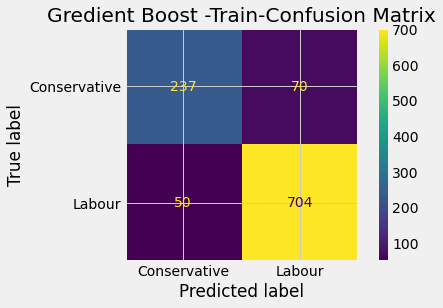

In [439]:
print(classification_report(y_train, gbcl_train_predict))
plot_confusion_matrix(gbcl,X_train,y_train);
plt.title('Gredient Boost -Train-Confusion Matrix')

### Test Performance GREDIENT BOOST

In [440]:
## Performance Matrix on test data set
gbcl_test_predict = gbcl.predict(X_test)
gbcl_test_score = gbcl.score(X_test, y_test)
gbcl_test_recall_score_Labour = recall_score(y_test, gbcl_test_predict,labels=None,pos_label = 'Labour')
gbcl_test_recall_score_Conservative = recall_score(y_test, gbcl_test_predict,labels=None,pos_label = 'Conservative')
print(gbcl_test_score,gbcl_test_recall_score_Conservative,gbcl_test_recall_score_Labour)

0.831140350877193 0.6862745098039216 0.9042904290429042


              precision    recall  f1-score   support

Conservative       0.78      0.69      0.73       153
      Labour       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



Text(0.5, 1.0, 'Gredient Boost -Test-Confusion Matrix')

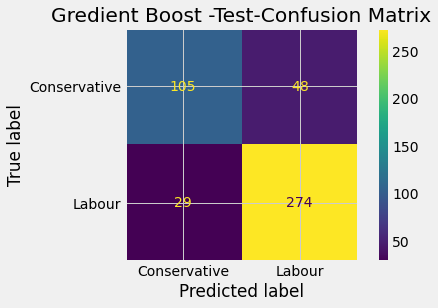

In [441]:
print(classification_report(y_test, gbcl_test_predict))
plot_confusion_matrix(gbcl,X_test,y_test);
plt.title('Gredient Boost -Test-Confusion Matrix')

In [442]:
gbcl_train_predict_prob = gbcl.predict_proba(X_train)
gbcl_test_predict_prob = gbcl.predict_proba(X_test)
pred_train_prob = gbcl.predict_proba(X_train)
pred_test_prob = gbcl.predict_proba(X_test)

gbcl_auc_train = roc_auc_score(y_train,gbcl_train_predict_prob[:,1])
gbcl_auc_test = roc_auc_score(y_test,gbcl_test_predict_prob[:,1])
print(gbcl_auc_train,gbcl_auc_test)


0.9458501455861895 0.8952522703250718


Text(0.5, 1.0, 'ROC-AUC Curve -Gredient Boost')

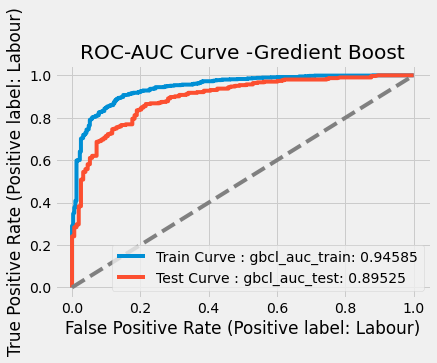

In [443]:
fig,ax = plt.subplots()
plot_roc_curve(gbcl, X_train,y_train,ax=ax, 
               label = 'Train Curve : gbcl_auc_train: '+str(round(gbcl_auc_train,5)));
plot_roc_curve(gbcl, X_test, y_test, ax=ax,
              label = 'Test Curve : gbcl_auc_test: '+ str(round(gbcl_auc_test,5)));
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC-AUC Curve -Gredient Boost')

### Decision Tree

In [444]:
from sklearn import tree

DT_model= tree.DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

### Training Data

In [445]:
## Performance Matrix on train data set
DT_train_predict = DT_model.predict(X_train)
DT_train_score = DT_model.score(X_train, y_train)
DT_train_recall_score_Labour = recall_score(y_train,DT_train_predict,labels=None,pos_label = 'Labour')
DT_train_recall_score_Conservative = recall_score(y_train,DT_train_predict,labels=None,pos_label = 'Conservative')
print(DT_train_score,DT_train_recall_score_Conservative,DT_train_recall_score_Labour)

0.9924599434495759 1.0 0.9893899204244032


              precision    recall  f1-score   support

Conservative       0.97      1.00      0.99       307
      Labour       1.00      0.99      0.99       754

    accuracy                           0.99      1061
   macro avg       0.99      0.99      0.99      1061
weighted avg       0.99      0.99      0.99      1061



Text(0.5, 1.0, 'Decision Tree -Train Confusion Matrix')

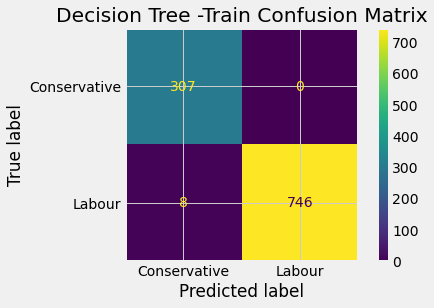

In [446]:
print(classification_report(y_train, DT_train_predict))
plot_confusion_matrix(DT_model,X_train,y_train);
plt.title('Decision Tree -Train Confusion Matrix')

### Test Performance

In [447]:
## Performance Matrix on test data set
DT_test_predict = DT_model.predict(X_test)
DT_test_score = DT_model.score(X_test, y_test)
DT_test_recall_score_Labour = recall_score(y_test, DT_test_predict,labels=None,pos_label = 'Labour')
DT_test_recall_score_Conservative = recall_score(y_test, DT_test_predict,labels=None,pos_label = 'Conservative')
print(DT_test_score,DT_test_recall_score_Conservative,DT_test_recall_score_Labour)

0.7653508771929824 0.6601307189542484 0.8184818481848185


              precision    recall  f1-score   support

Conservative       0.65      0.66      0.65       153
      Labour       0.83      0.82      0.82       303

    accuracy                           0.77       456
   macro avg       0.74      0.74      0.74       456
weighted avg       0.77      0.77      0.77       456



Text(0.5, 1.0, 'Decision Tree -Test Confusion Matrix')

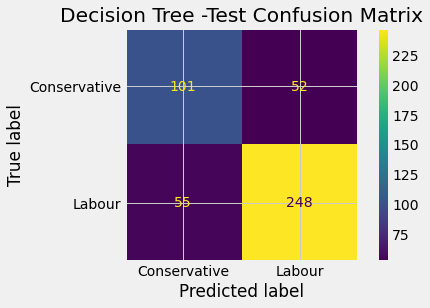

In [448]:
print(classification_report(y_test, DT_test_predict))
plot_confusion_matrix(DT_model, X_test, y_test);
plt.title('Decision Tree -Test Confusion Matrix')

Text(0.5, 1.0, 'ROC Curve -ADA-Boost Model')

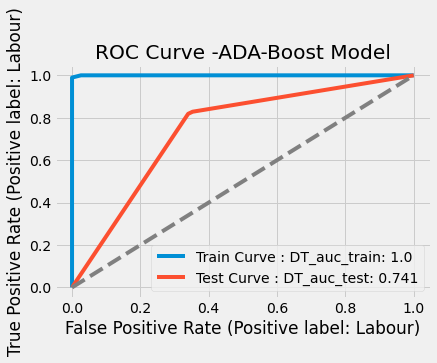

In [449]:
DT_pred_train_prob = DT_model.predict_proba(X_train)
DT_pred_test_prob = DT_model.predict_proba(X_test)

DT_auc_train = roc_auc_score(y_train,DT_pred_train_prob[:,1])
DT_auc_test = roc_auc_score(y_test,DT_pred_test_prob[:,1])

fig,ax = plt.subplots()
plot_roc_curve(DT_model, X_train,y_train,ax=ax, 
               label = 'Train Curve : DT_auc_train: '+str(round(DT_auc_train,3)));
plot_roc_curve(DT_model, X_test, y_test, ax=ax,
              label = 'Test Curve : DT_auc_test: '+ str(round(DT_auc_test,3)));
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC Curve -ADA-Boost Model')

.

.

## Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model (4 pts) Final Model - Compare all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized (3 pts)

### Comparison of Different Models

In [450]:

model_names = ['Naive-Bayes','LDA','ADABoost',
              'GradientBoost','KNN','DecisionTree',
              'RF','Bagging']

train_recalls = [NB_train_recall_score_Labour,LDA_train_recall_score_Labour,
                ADB_train_recall_score_Labour,gbcl_train_recall_score_Labour,
                KNN_train_recall_score_Labour,DT_train_recall_score_Labour,
                RF_train_recall_score_Labour,
                 Bagging_train_recall_score_Labour]
test_recalls = [NB_test_recall_score_Labour,LDA_test_recall_score_Labour,
               ADB_test_recall_score_Labour,gbcl_test_recall_score_Labour,
               KNN_test_recall_score_Labour,DT_test_recall_score_Labour,
               RF_test_recall_score_Labour,Bagging_test_recall_score_Labour]
Accuracy_Train = [NB_train_score,LDA_train_score,
                ADB_train_score,gbcl_train_score,
                KNN_train_score,DT_train_score,
                RF_train_score,
                 Bagging_train_score]
Accuracy_Test = [NB_test_score,LDA_test_score,
                ADB_test_score,gbcl_test_score,
                KNN_test_score,DT_test_score,
                RF_test_score,
                 Bagging_test_score]

recall_df = pd.DataFrame({'Train Recall':train_recalls,
                         'Test Recall':test_recalls,'Accuracy Train':Accuracy_Train,'Accuracy Test':Accuracy_Test},
                        index=model_names)
recall_df


,Train Recall,Test Recall,Accuracy Train,Accuracy Test
Naive-Bayes,0.893899,0.867987,0.836004,0.820175
LDA,0.907162,0.894389,0.833176,0.837719
ADABoost,0.905836,0.887789,0.840716,0.822368
GradientBoost,0.933687,0.904290,0.886899,0.831140
KNN,0.901857,0.907591,0.838831,0.831140
DecisionTree,0.989390,0.818482,0.992460,0.765351
RF,0.996021,0.897690,0.992460,0.811404
Bagging,0.992042,0.907591,0.961357,0.828947


So as per the test data, 
best performing model is - Linear Discriminant Analysis

Best Performing models are - Decision Tree ,  Random Forest and Bagging

However are these best performing models overfitted??

Let's look at the performance on the test data set

## Conclusion

**So we will select models which have performed approximately similar on the train and test data set and apply SMOTE on the same to check if the performance improves or not eg. Naive Bayes and KNN**

## SMOTE 

In [451]:
#!pip install imblearn 
#(from notebook) or 
# pip install imblearn (from anaconda prompt)
# Above is required to be done once only for installing the module

In [452]:
from imblearn.over_sampling import SMOTE

**SMOTE is only applied on the train data set**

In [453]:
sm = SMOTE(random_state=2)

In [454]:
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [455]:
y_train.value_counts()

Labour          754
Conservative    307
Name: vote, dtype: int64

In [456]:
y_train_res.value_counts()

Conservative    754
Labour          754
Name: vote, dtype: int64

In [457]:
X_train.shape, X_train_res.shape

((1061, 8), (1508, 8))

## Naive Bayes with SMOTE

In [458]:
NB_SM_model = GaussianNB()
NB_SM_model.fit(X_train_res, y_train_res)

GaussianNB()

### Training Performance

In [459]:
## Performance Matrix on train data set with SMOTE
NBSM_train_predict = NB_SM_model.predict(X_train_res)
NBSM_train_score = NB_SM_model.score(X_train_res, y_train_res)
# NBSM_train_recall = NB_SM_model.recall_score(y_train_res,NBSM_train_predict)
print(NBSM_train_score)

0.8342175066312998


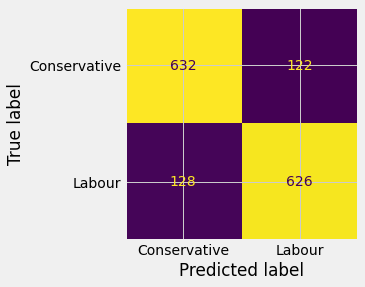

In [460]:
plot_confusion_matrix(NB_SM_model,X_train_res,y_train_res,
                     colorbar=False);

In [461]:
print(classification_report(y_train_res ,NBSM_train_predict))

              precision    recall  f1-score   support

Conservative       0.83      0.84      0.83       754
      Labour       0.84      0.83      0.83       754

    accuracy                           0.83      1508
   macro avg       0.83      0.83      0.83      1508
weighted avg       0.83      0.83      0.83      1508



### Test Performance

In [462]:
## Performance Matrix on test data set
NBSM_test_predict = NB_SM_model.predict(X_test)
NBSM_test_score = NB_SM_model.score(X_test, y_test)
print(NBSM_test_score)

0.8026315789473685


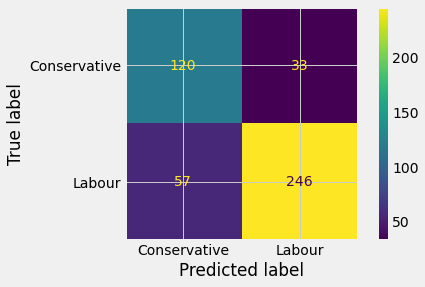

In [463]:
plot_confusion_matrix(NB_SM_model,X_test,y_test);

In [464]:
print(classification_report(y_test, NBSM_test_predict))

              precision    recall  f1-score   support

Conservative       0.68      0.78      0.73       153
      Labour       0.88      0.81      0.85       303

    accuracy                           0.80       456
   macro avg       0.78      0.80      0.79       456
weighted avg       0.81      0.80      0.81       456



## KNN With SMOTE

In [465]:
from sklearn.neighbors import KNeighborsClassifier

KNN_SM_model=KNeighborsClassifier()
KNN_SM_model.fit(X_train_res,y_train_res)

KNeighborsClassifier()

### Training Performance

In [466]:
## Performance Matrix on train data set
KNN_SM_train_predict = KNN_SM_model.predict(X_train_res)
KNN_SM_train_score = KNN_SM_model.score(X_train_res, y_train_res)
print(KNN_SM_train_score)

0.8885941644562334


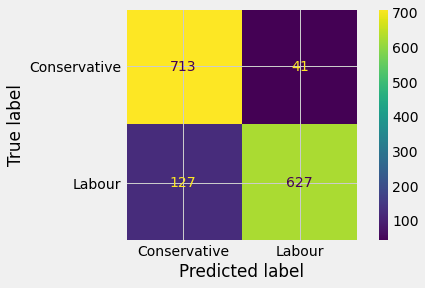

In [467]:
plot_confusion_matrix(KNN_SM_model,X_train_res,y_train_res);

In [468]:
print(classification_report(y_train_res, KNN_SM_train_predict))

              precision    recall  f1-score   support

Conservative       0.85      0.95      0.89       754
      Labour       0.94      0.83      0.88       754

    accuracy                           0.89      1508
   macro avg       0.89      0.89      0.89      1508
weighted avg       0.89      0.89      0.89      1508



### Test Performance

In [469]:
## Performance Matrix on test data set
KNN_SM_test_predict = KNN_SM_model.predict(X_test)
KNN_SM_test_score = KNN_SM_model.score(X_test, y_test)
print(KNN_SM_test_score)

0.8048245614035088


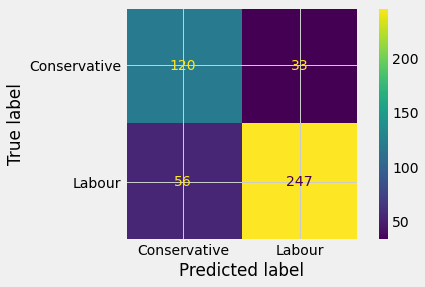

In [470]:
plot_confusion_matrix(KNN_SM_model,X_test,y_test);

In [471]:
print(classification_report(y_test, KNN_SM_test_predict))

              precision    recall  f1-score   support

Conservative       0.68      0.78      0.73       153
      Labour       0.88      0.82      0.85       303

    accuracy                           0.80       456
   macro avg       0.78      0.80      0.79       456
weighted avg       0.81      0.80      0.81       456



## Conclusion after SMOTE

- Recall for Naive Bayes decresed significantly.
- Huge Difference between the train and test dataset Recall value,Accuracy  for KNN 

Note: SMOTE as a technique is generally applied if minority class is below 5%. 

You are advised to perform SMOTE on other models as well to compare the result

In [472]:
model_names = ['Naive-Bayes SMOTE','KNN SMOTE']


Accuracy_Train = [NBSM_train_score,
                KNN_SM_train_score]
Accuracy_Test = [NBSM_test_score,
                KNN_SM_test_score]

recall_df1 = pd.DataFrame({'Accuracy Train':Accuracy_Train,'Accuracy Test':Accuracy_Test},
                        index=model_names)
recall_df1

,Accuracy Train,Accuracy Test
Naive-Bayes SMOTE,0.834218,0.802632
KNN SMOTE,0.888594,0.804825


In [473]:
model_names = ['Naive-Bayes','LR','LDA','ADABoost',
              'GradientBoost','KNN','DecisionTree',
              'RF','Bagging']

train_recalls = [NB_train_recall_score_Labour,LR_train_recall_score_Labour,LDA_train_recall_score_Labour,
                ADB_train_recall_score_Labour,gbcl_train_recall_score_Labour,
                KNN_train_recall_score_Labour,DT_train_recall_score_Labour,
                RF_train_recall_score_Labour,
                 Bagging_train_recall_score_Labour]
test_recalls = [NB_test_recall_score_Labour,LR_test_recall_score_Labour,LDA_test_recall_score_Labour,
               ADB_test_recall_score_Labour,gbcl_test_recall_score_Labour,
               KNN_test_recall_score_Labour,DT_test_recall_score_Labour,
               RF_test_recall_score_Labour,Bagging_test_recall_score_Labour]
Accuracy_Train = [NB_train_score,LR_train_score,LDA_train_score,
                ADB_train_score,gbcl_train_score,
                KNN_train_score,DT_train_score,
                RF_train_score,
                 Bagging_train_score]
Accuracy_Test = [NB_test_score,LR_test_score,LDA_test_score,
                ADB_test_score,gbcl_test_score,
                KNN_test_score,DT_test_score,
                RF_test_score,
                 Bagging_test_score]

recall_df = pd.DataFrame({'Train Recall':train_recalls,
                         'Test Recall':test_recalls,'Accuracy Train':Accuracy_Train,'Accuracy Test':Accuracy_Test},
                        index=model_names)
recall_df

,Train Recall,Test Recall,Accuracy Train,Accuracy Test
Naive-Bayes,0.893899,0.867987,0.836004,0.820175
LR,0.909814,0.884488,0.830349,0.831140
LDA,0.907162,0.894389,0.833176,0.837719
ADABoost,0.905836,0.887789,0.840716,0.822368
GradientBoost,0.933687,0.904290,0.886899,0.831140
KNN,0.901857,0.907591,0.838831,0.831140
DecisionTree,0.989390,0.818482,0.992460,0.765351
RF,0.996021,0.897690,0.992460,0.811404
Bagging,0.992042,0.907591,0.961357,0.828947


## Cross Validation on Naive Bayes Model

In [474]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(NB_SM_model, X_train_res, y_train_res, cv=10)
scores # accuracy scores

array([0.78145695, 0.82119205, 0.82781457, 0.78807947, 0.88741722,
       0.8410596 , 0.82119205, 0.86754967, 0.80666667, 0.86      ])

In [475]:
rec_scores = cross_val_score(NB_SM_model,X_train_res,y_train_res, cv=10,
                            scoring='accuracy')
rec_scores # recall scores on each iteration of the 10 fold cross validation

array([0.78145695, 0.82119205, 0.82781457, 0.78807947, 0.88741722,
       0.8410596 , 0.82119205, 0.86754967, 0.80666667, 0.86      ])

In [476]:
rec_scores.mean() # average recall score across all iterations of 10 fold cv

0.830242825607064

In [477]:
## After 10 fold cross validation, scores both on  data set a for all 10 folds are almost same. 
## Hence our model is valid.
## Students are advised to perform CV on other models and compare the results.

**Pl. note - Model building is an iterative process. Model performance both on the test and train dataset can be improved using feature engineering, feature extraction, hyper parameter tuning (including combination of various parameters).
Model has to match the business objective and hence various permutation and combinations can be tried on to refine the model.**

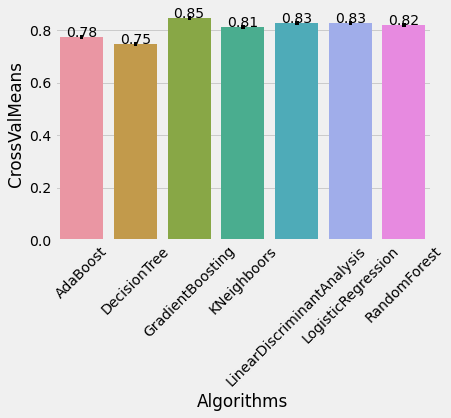

In [480]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, KFold
K_fold = StratifiedKFold(n_splits=10)
# Modeling step Test differents algorithms 
random_state = 1

models = [] # append all models or predictive models 
cv_results = [] # cross validation result
cv_means = [] # cross validation mean value
cv_std = [] # cross validation standard deviation

models.append(KNeighborsClassifier())
models.append(AdaBoostClassifier(DecisionTreeClassifier(),random_state=random_state,learning_rate=0.1))
cross_val_score(NB_SM_model,X_train_res,y_train_res, cv=10,
                            scoring='accuracy')
models.append(DecisionTreeClassifier(random_state=random_state))
models.append(RandomForestClassifier(random_state=random_state))
models.append(GradientBoostingClassifier(random_state=random_state))
models.append(LogisticRegression(random_state = random_state))
models.append(LinearDiscriminantAnalysis())



for model in models :
    cv_results.append(cross_val_score(model, X_train, y_train, 
                                      scoring = "accuracy", cv = K_fold, n_jobs=4))

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_frame = pd.DataFrame(
    {
        "CrossValMeans":cv_means,
        "CrossValErrors": cv_std,
        "Algorithms":[
                     "KNeighboors",
                     "AdaBoost", 
                     "DecisionTree",   
                     "RandomForest",
                     "GradientBoosting",                      
                     "LogisticRegression",
                     "LinearDiscriminantAnalysis",
                     ]
    })

groupedvalues = cv_frame.groupby('Algorithms').sum().reset_index()

g =sns.barplot(x='Algorithms',y="CrossValMeans",data=groupedvalues, **{'xerr':cv_std})
g.set_xticklabels(g.get_xticklabels(), 
                          rotation=45)

for index, row in groupedvalues.iterrows():
    g.text(row.name,row.CrossValMeans, round(row.CrossValMeans,2), color='black', ha="center")



# cv_plot = sns.barplot("CrossValMeans","Algorithms", data = cv_frame,
#                 palette="husl", orient = "h", **{'xerr':cv_std})

# cv_plot.set_xlabel("Mean Accuracy")
# cv_plot = cv_plot.set_title("CV Scores")


In [481]:
groupedvalues = cv_frame.groupby('Algorithms').sum().reset_index()
groupedvalues

,Algorithms,CrossValMeans,CrossValErrors
0,AdaBoost,0.775701,0.032487
1,DecisionTree,0.748360,0.026929
2,GradientBoosting,0.845415,0.037358
3,KNeighboors,0.810589,0.029713
4,LinearDiscriminantAnalysis,0.828487,0.030502
5,LogisticRegression,0.827526,0.025642
6,RandomForest,0.819053,0.034136


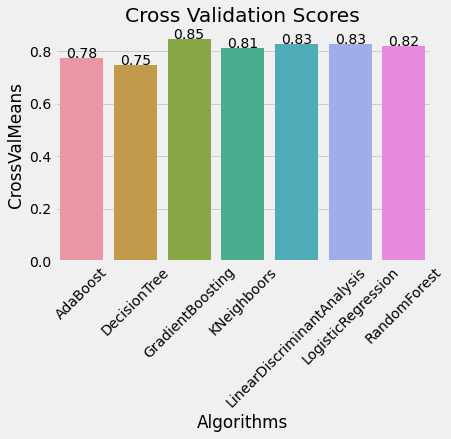

In [482]:
g =sns.barplot(x='Algorithms',y="CrossValMeans",data=groupedvalues)
g.set_xticklabels(g.get_xticklabels(), 
                          rotation=45)
g.set_title("Cross Validation Scores")

for index, row in groupedvalues.iterrows():
    g.text(row.name,row.CrossValMeans, round(row.CrossValMeans,2), color='black', ha="center")

.

.

.